Data Analytics de empresa de Telecomunicaciones.
Analisís exploratorio de los datos recopilados(EDA)

Importación de librerias a utilizar

In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [4]:
# Manejo de mensajes warnings
warnings.filterwarnings('ignore')

Ingesta de archivos con respectivas hojas para posterior análisis.

In [6]:
import pandas as pd

# Definir las rutas de los archivos y las hojas específicas que se quieren leer
archivos_hojas = {
    r'C:\Users\walter\desktop\Data_Analytics\Datasets\Internet.xlsx': [
        'Penetración-poblacion', 'Penetracion-hogares',
        'Accesos Por Tecnología', 'Totales Accesos Por Tecnología', 'Accesos por velocidad',
        'Velocidad % por prov', 'Totales Accesos por velocidad', 'Ingresos'
    ],
    r'C:\Users\walter\desktop\Data_Analytics\Datasets\Television.xlsx': [
        'Accesos_totales_TV', 'Ingresos_TV'
    ],
    r'C:\Users\walter\desktop\Data_Analytics\Datasets\telefonia_fija.xlsx': [
        'Fija_penetracion_prov', 'Fija_ingresos'
    ],
    r'C:\Users\walter\desktop\Data_Analytics\Datasets\servicios_postales.xlsx': [
        'ventas_unidades_provincias'
    ],
    r'C:\Users\walter\desktop\Data_Analytics\Datasets\Portabilidad.xlsx': [
        'Portin'
    ],
    r'C:\Users\walter\desktop\Data_Analytics\Datasets\mapa_conectividad.xlsx': [
        'Hoja3'
    ]
}

# Diccionario para almacenar los dataframes seleccionados
dataframes_seleccionados = {}

# Leer y seleccionar las hojas deseadas de cada archivo Excel
for ruta, hojas in archivos_hojas.items():
    try:
        # Leer los nombres de las hojas en el archivo
        nombres_hojas = pd.ExcelFile(ruta).sheet_names
        print(f"Hojas en el archivo {ruta}: {nombres_hojas}")
        
        # Verificar si las hojas especificadas están presentes
        hojas_validas = [hoja for hoja in hojas if hoja in nombres_hojas]
        if not hojas_validas:
            print(f"No se encontraron las hojas especificadas en el archivo {ruta}")
            continue
        
        # Leer las hojas válidas
        hojas_dataframes = pd.read_excel(ruta, sheet_name=hojas_validas)
        dataframes_seleccionados.update(hojas_dataframes)
    except Exception as e:
        print(f"Error al leer el archivo {ruta}: {e}")

# Mostrar los dataframes seleccionados y verificar su contenido
for nombre, df in dataframes_seleccionados.items():
    print(f"Dataframe de la hoja: {nombre}")
    print(df.head())

# Alinear columnas
columnas_relevantes = [
    'Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hab', 
    'Accesos por cada 100 hogares', 'Ingresos (miles de pesos)', 'Periodo',
    'Accesos TV por suscripción', 'Accesos TV satelital', 'Correo oficial', 
    'Correos Privados (en Pesos)', 'Correo oficial + Correos Privados (en Unidades)', 
    'Mes', 'Personal', 'Claro', 'Nextel', 'Movistar', 'Otros', 'Total general'
]

# Concatenar los dataframes
df_consolidado = pd.concat(dataframes_seleccionados.values(), ignore_index=True)

# Mostrar los dataframes seleccionados y verificar su contenido
for nombre, df in dataframes_seleccionados.items():
    print(f"Dataframe de la hoja: {nombre}")
    print(df.head())

# Verificar la estructura del dataframe consolidado
print(df_consolidado.info())

# Mostrar una muestra del dataframe consolidado
print(df_consolidado.head())





Hojas en el archivo C:\Users\walter\desktop\Data_Analytics\Datasets\Internet.xlsx: ['Acc_vel_loc_sinrangos', 'Velocidad_sin_Rangos', 'Velocidad % por prov', 'Totales VMD', 'Accesos_tecnologia_localidad', 'Totales Accesos Por Tecnología', 'Accesos Por Tecnología', 'Dial-BAf', 'Totales Dial-BAf', 'Penetración-poblacion', 'Penetracion-hogares', 'Penetracion-totales', 'Totales Accesos por velocidad', 'Accesos por velocidad', 'Ingresos']
Hojas en el archivo C:\Users\walter\desktop\Data_Analytics\Datasets\Television.xlsx: ['Accesos_prov_TV', 'Accesos_totales_TV', 'Ingresos_TV', 'Penetracion_prov_TV', 'Penetracion_totales_TV']
Hojas en el archivo C:\Users\walter\desktop\Data_Analytics\Datasets\telefonia_fija.xlsx: ['Fija_prov_tipo', 'Fija_accesos_tot', 'Fija_penetracion_prov', 'Fija_penetracion_tot', 'Fija_ingresos']
Hojas en el archivo C:\Users\walter\desktop\Data_Analytics\Datasets\servicios_postales.xlsx: ['ventas_postales', 'ventas_telegraficas', 'venta_monetarios', 'ventas_unidades_provi

Identificación y manejos de valores faltantes(nulos)

In [7]:
# Verificar valores nulos
print("Valores nulos por columna antes de la imputación:")
null_counts = df_consolidado.isnull().sum()
print(null_counts[null_counts > 0])






Valores nulos por columna antes de la imputación:
Año                                                 4312
Trimestre                                           4451
Provincia                                            380
Accesos por cada 100 hab                           10355
Accesos por cada 100 hogares                       10355
ADSL                                                6004
Cablemodem                                         10315
Fibra óptica                                        6004
Wireless                                            6004
Otros                                              10296
Total                                               9315
Periodo                                            11235
HASTA 512 kbps                                     10355
+ 512 Kbps - 1 Mbps                                10355
+ 1 Mbps - 6 Mbps                                  10355
+ 6 Mbps - 10 Mbps                                 10355
+ 10 Mbps - 20 Mbps                   

Conversión de datos y clasificación de columnas en numericas y categoricas para posterior inputacion de valores nulos,utilizando la moda(con valores mas frecuentes) y mediana(con para valores exixtentes).

In [10]:

# Convertir 'Año' y 'Mes' a numérico si existen en el DataFrame
if 'Año' in df_consolidado.columns:
    df_consolidado['Año'] = pd.to_numeric(df_consolidado['Año'], errors='coerce')
if 'Mes' in df_consolidado.columns:
    df_consolidado['Mes'] = pd.to_numeric(df_consolidado['Mes'], errors='coerce')

# Clasificar columnas numéricas y categóricas
categoricas_columnas = [
    'Provincia', 'Accesos TV por suscripción', 'Accesos TV satelital', 
    'Correo oficial', 'Correos Privados (en Pesos)', 'Personal', 'Claro',
    'Movistar'
]

# Filtrar solo las columnas que existen en el DataFrame
categoricas_columnas = [col for col in categoricas_columnas if col in df_consolidado.columns]
numericas_columnas = [col for col in df_consolidado.columns if col not in categoricas_columnas and df_consolidado[col].dtype in ['float64', 'int64']]

print("Columnas numéricas:", numericas_columnas)
print("Columnas categóricas:", categoricas_columnas)

Columnas numéricas: ['Año', 'Accesos por cada 100 hab', 'Accesos por cada 100 hogares', 'Cablemodem', 'Otros', 'Total', 'HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS', 'Mbps (Media de bajada)', 'Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps', 'Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps', 'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps', 'Ingresos (miles de pesos)', 'Ingresos TV por suscripción  (miles de $)', 'Ingresos TV satelital (miles de $)', 'Accesos telefonía fija por cada 100 hab', 'Accesos telefonía fija por cada 100 hogares', 'Ingresos (miles de $)', 'Correo oficial  + Correos Privados (en Pesos)', 'Correo oficial + Correos Privados (en Unidades)', 'Mes', 'Nextel', 'Total general', 'Población', 'Link', 'Latitud', 'Longitud']
Columnas categóricas: ['Provincia', 'Accesos TV por suscripción', 'Accesos TV satelital', 'Personal', 'Claro', 'Movistar']


In [17]:
# Función para corregir el año
def corregir_anio(anio):
    anio_str = str(anio)
    if len(anio_str) == 5:
        return int(anio_str[:4])
    else:
        return anio

# Aplicar la función a la columna 'Año'
df_consolidado['Año'] = df_consolidado['Año'].apply(corregir_anio)

# Verificar los primeros registros para asegurarnos de que se ha corregido
print(df_consolidado.head())

         Año                                          Trimestre     Provincia  \
2880  2018.5                                                NaN  BUENOS AIRES   
2881  2018.5  Los datos provinciales no coinciden a nivel na...  BUENOS AIRES   
4930  2021.0                                                  4  BUENOS AIRES   
4931  2021.0                                                  3  BUENOS AIRES   
4932  2021.0                                                  2  BUENOS AIRES   

      Accesos por cada 100 hab  Accesos por cada 100 hogares ADSL  Cablemodem  \
2880                 13.417453                     48.817167  NaN     41752.5   
2881                 13.417453                     48.817167  NaN     41752.5   
4930                 13.417453                     48.817167  NaN     41752.5   
4931                 13.417453                     48.817167  NaN     41752.5   
4932                 13.417453                     48.817167  NaN     41752.5   

     Fibra óptica Wireless

In [11]:
# Imputar valores nulos en columnas numéricas con la mediana
for col in numericas_columnas:
    if df_consolidado[col].isnull().sum() > 0:
        df_consolidado[col].fillna(df_consolidado[col].median(), inplace=True)

# Imputar valores nulos en columnas categóricas con la moda
for col in categoricas_columnas:
    if df_consolidado[col].isnull().sum() > 0:
        df_consolidado[col].fillna(df_consolidado[col].mode()[0], inplace=True)

# Verificar nuevamente la cantidad de valores nulos por columna
print("Valores nulos por columna después de la imputación:")
null_counts_result = df_consolidado.isnull().sum()
print(null_counts_result[null_counts_result > 0])

Valores nulos por columna después de la imputación:
Trimestre          4451
ADSL               6004
Fibra óptica       6004
Wireless           6004
Periodo           11235
 Periodo          11276
Partido            7004
Localidad          7004
Cablemódem         7004
Dial Up            7004
Satelital          7004
Telefonía Fija     7004
3G                 7004
4G                 7004
dtype: int64


Verificación de registros duplicados.

In [10]:
# Verificar y eliminar duplicados
duplicados = df_consolidado.duplicated().sum()
print(f"Cantidad de registros duplicados: {duplicados}")

# Eliminar duplicados
df_consolidado.drop_duplicates(inplace=True)

# Verificar nuevamente la cantidad de registros
print(f"Cantidad de registros después de eliminar duplicados: {df_consolidado.shape[0]}")

Cantidad de registros duplicados: 0
Cantidad de registros después de eliminar duplicados: 11315


Visualización de valores outliers ya que su existencia van a distorcionar el análisis estadístico

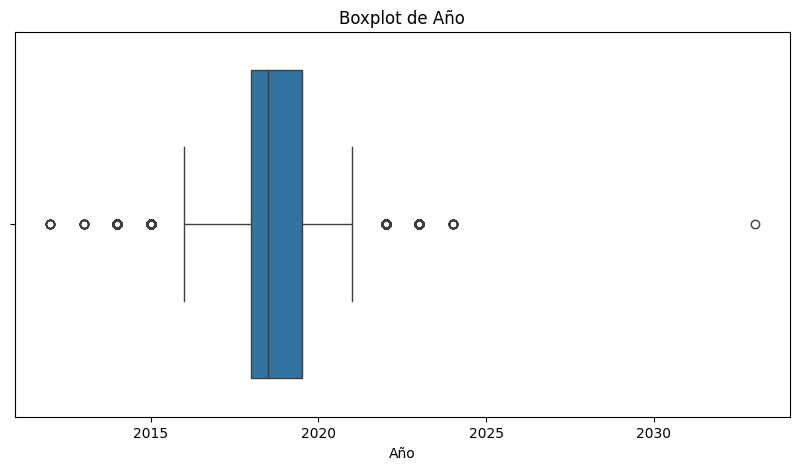

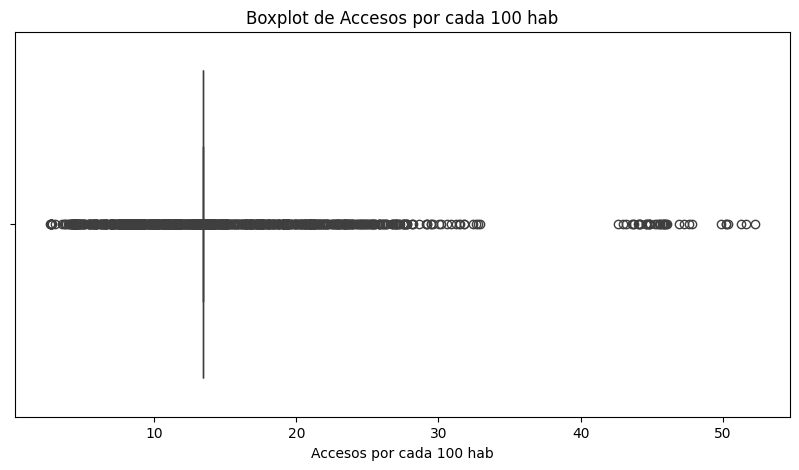

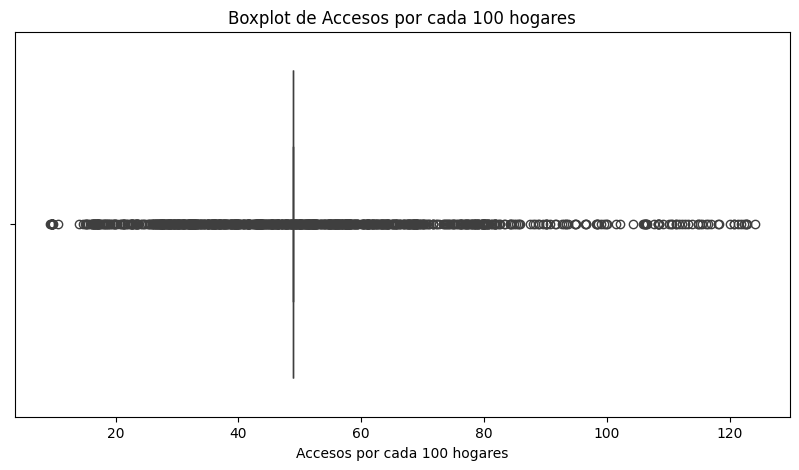

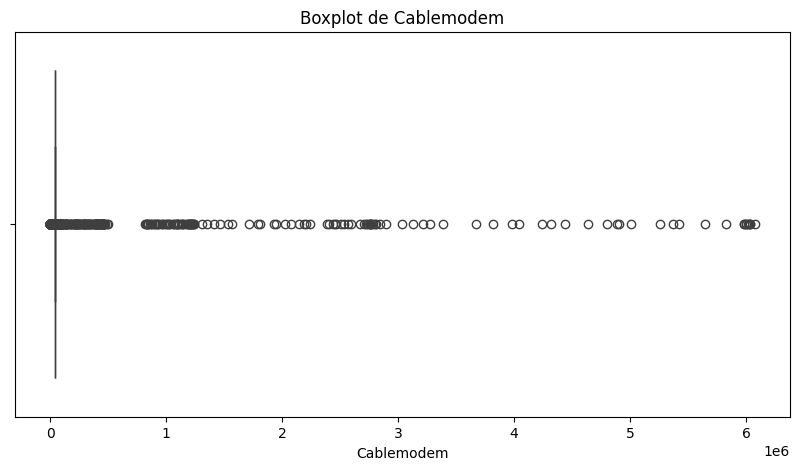

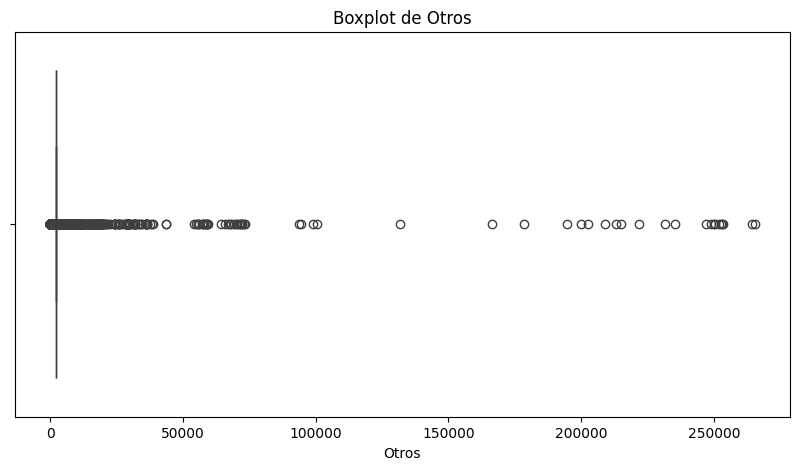

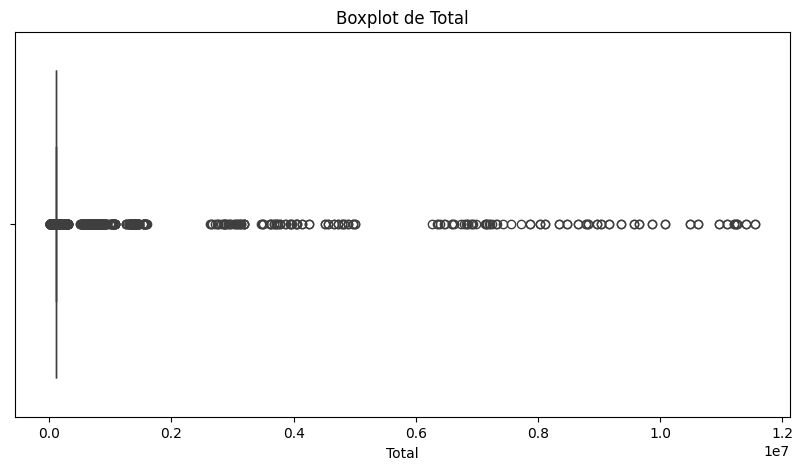

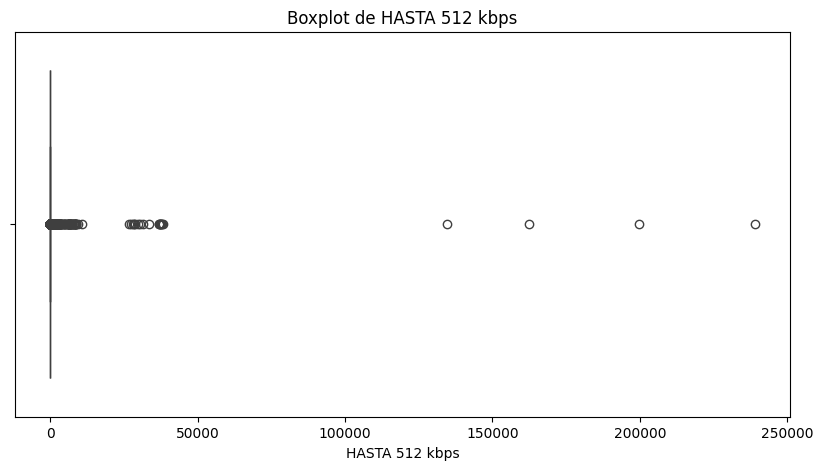

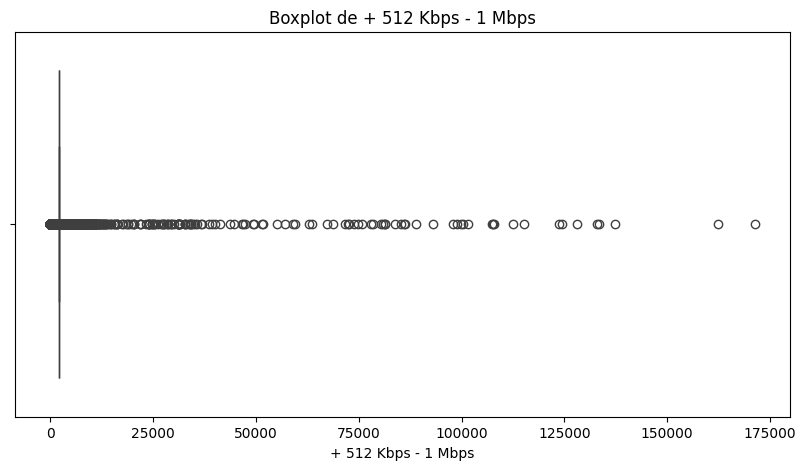

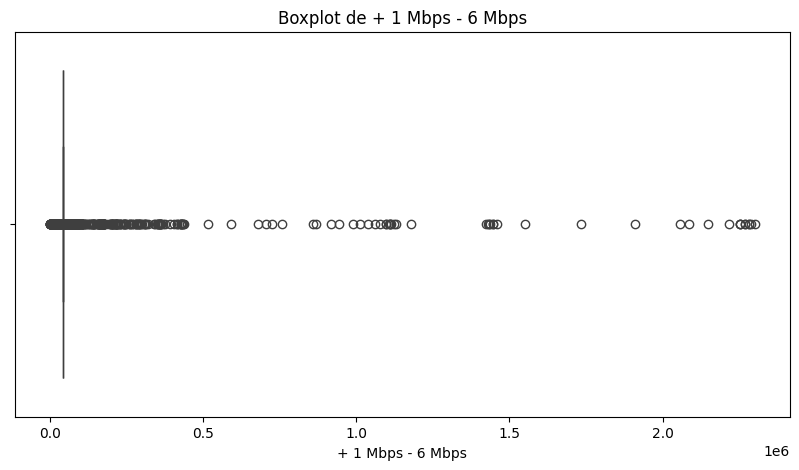

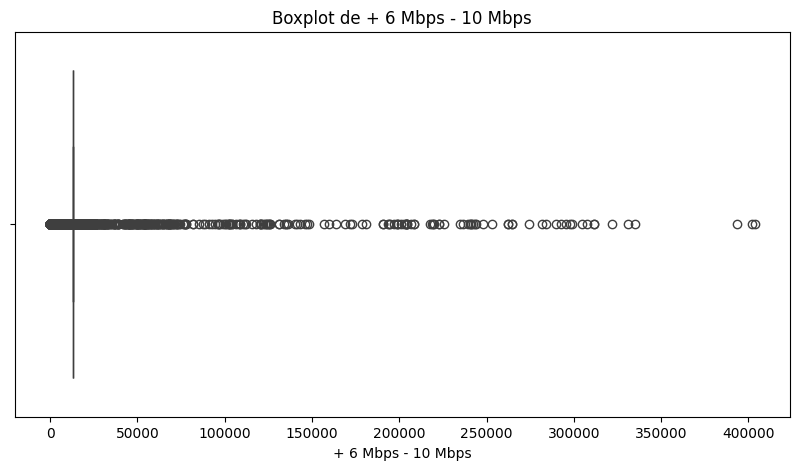

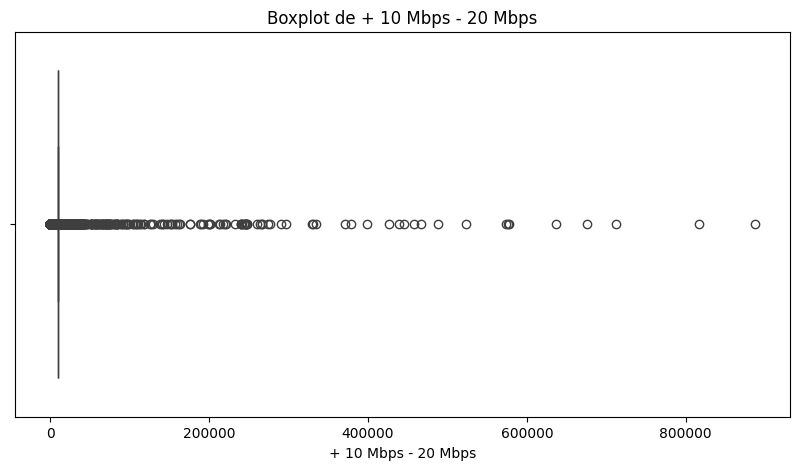

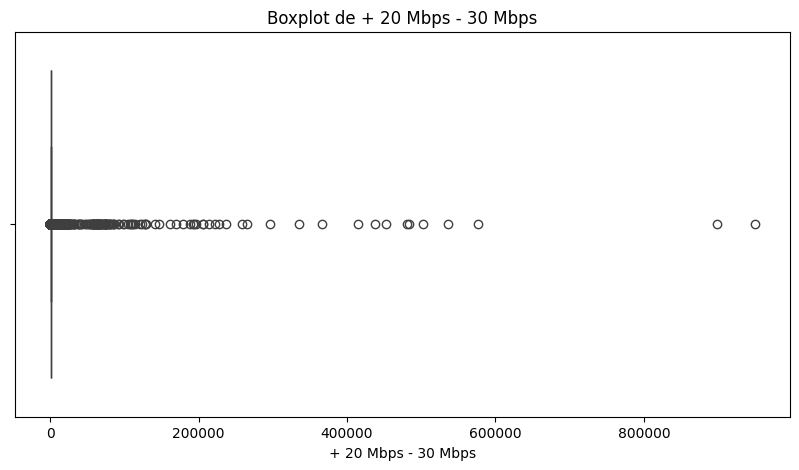

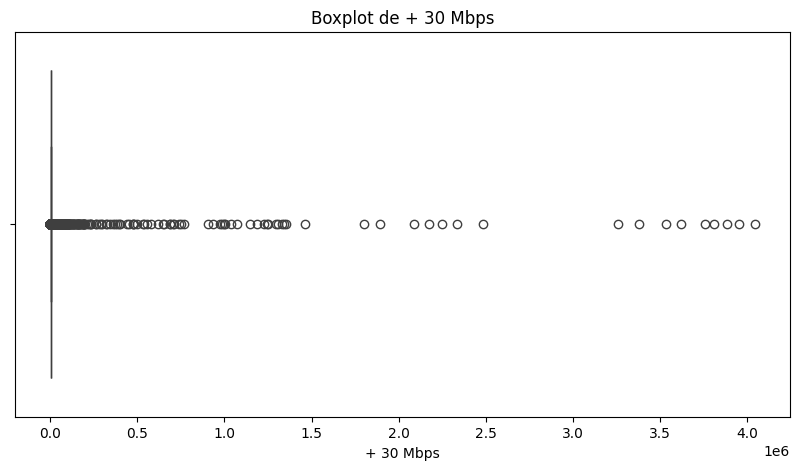

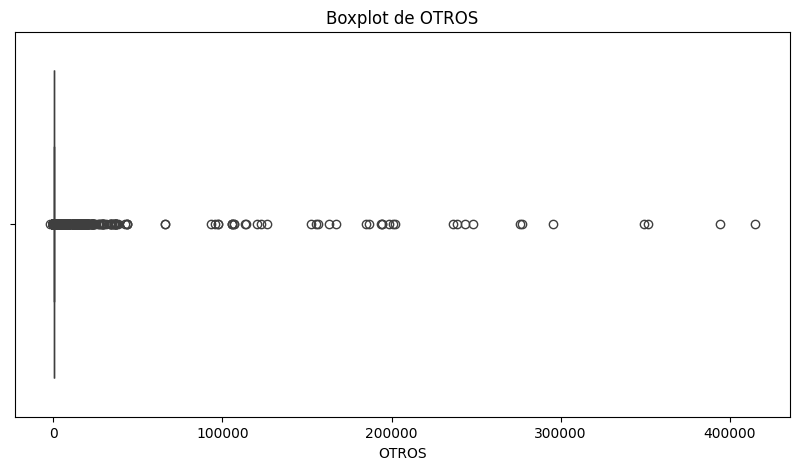

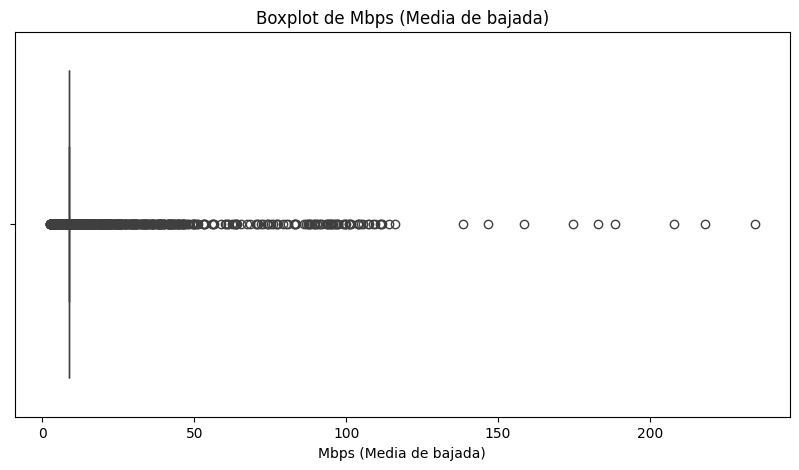

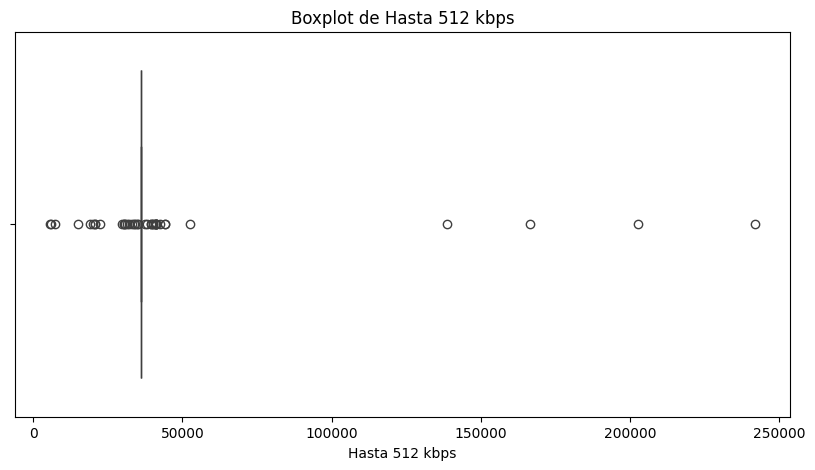

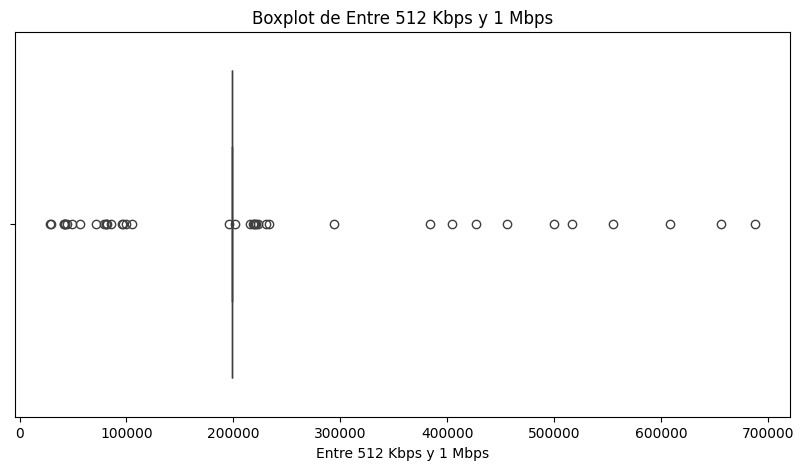

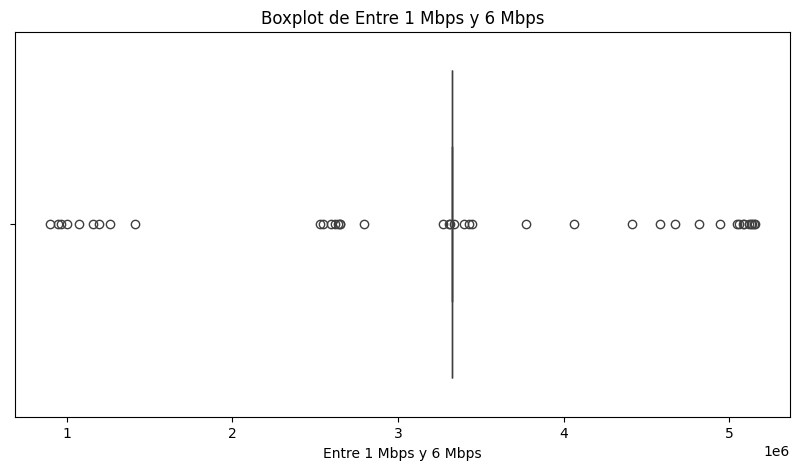

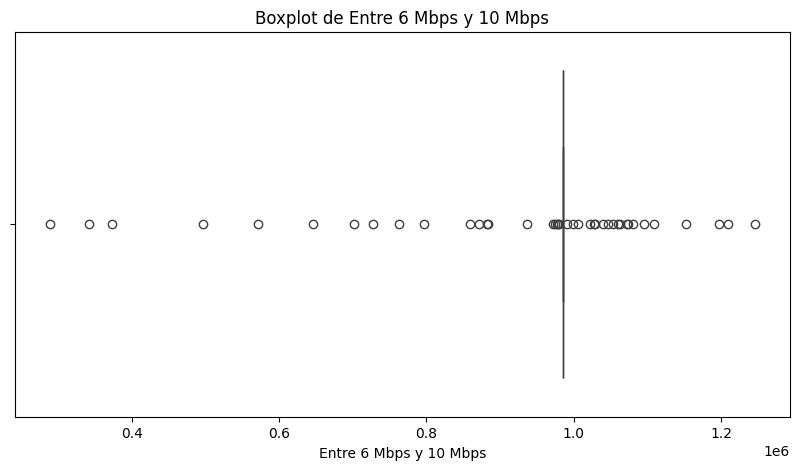

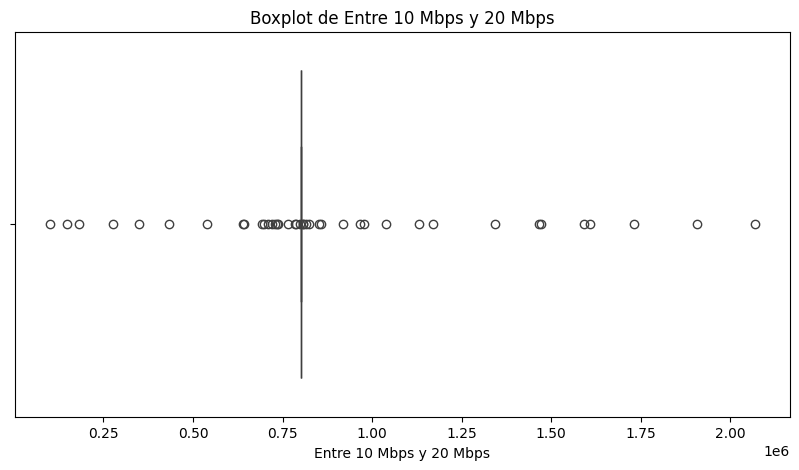

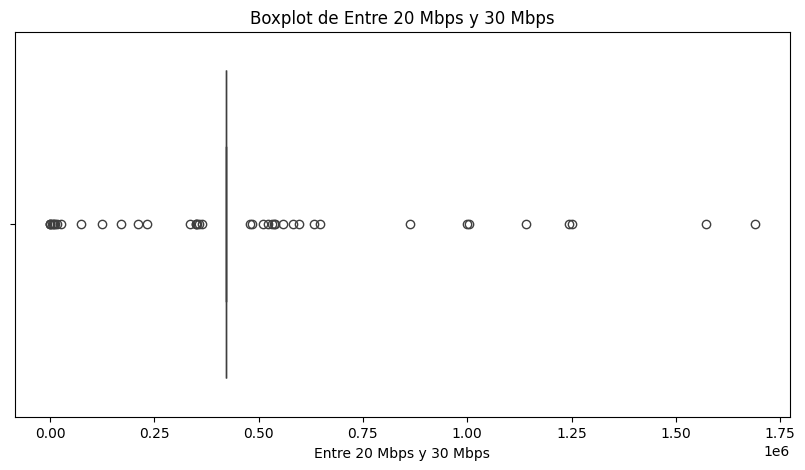

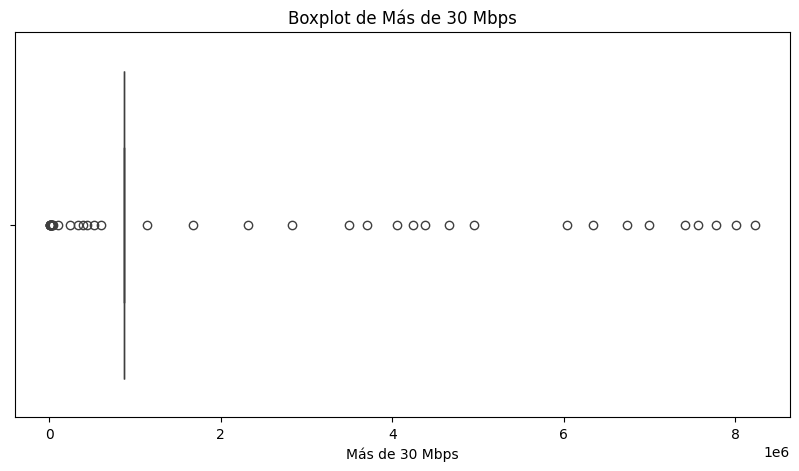

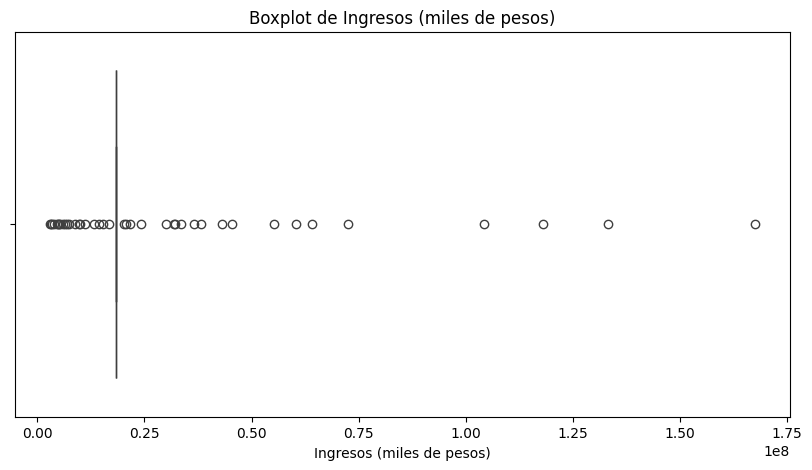

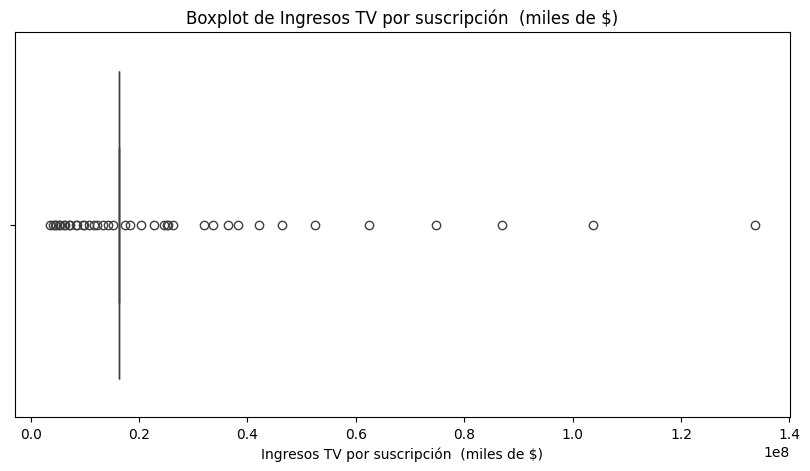

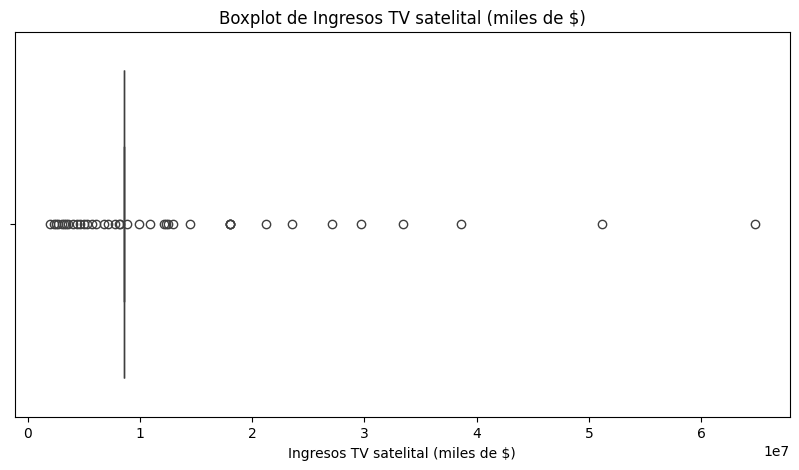

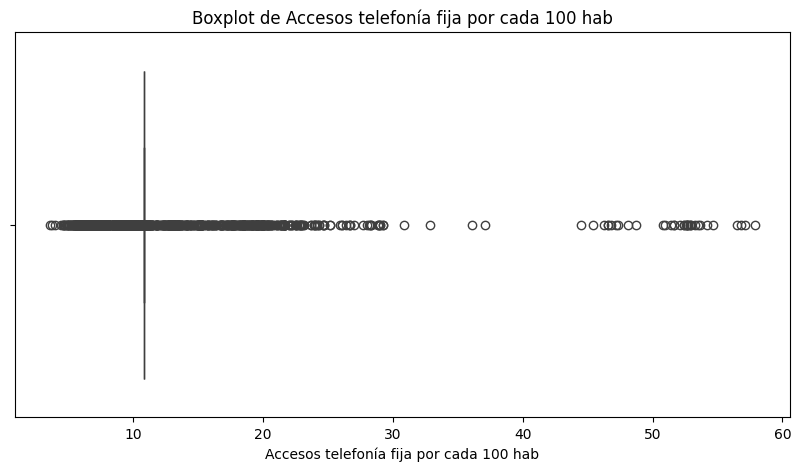

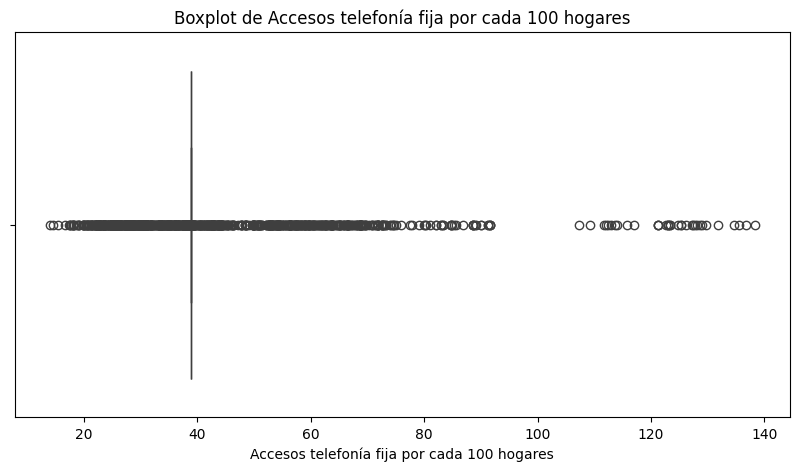

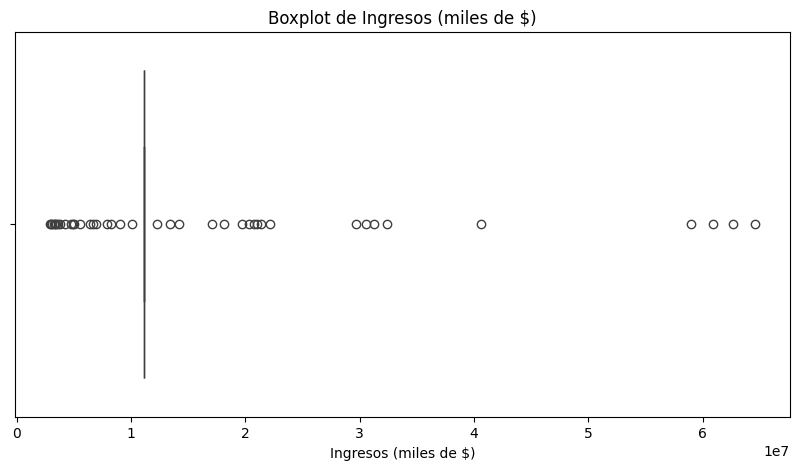

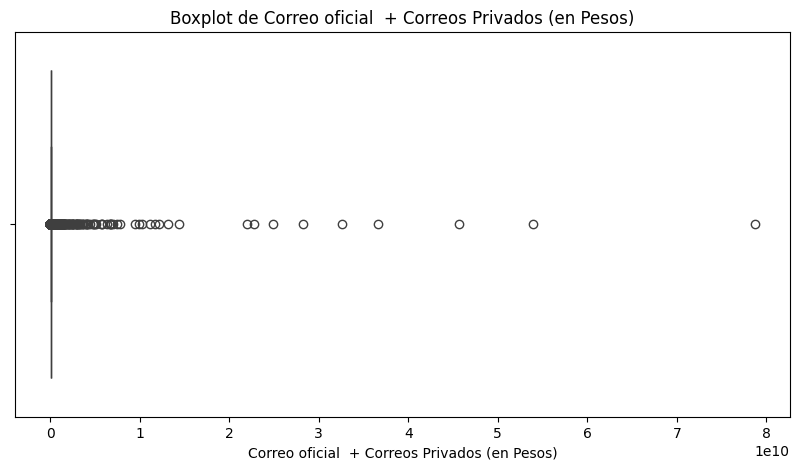

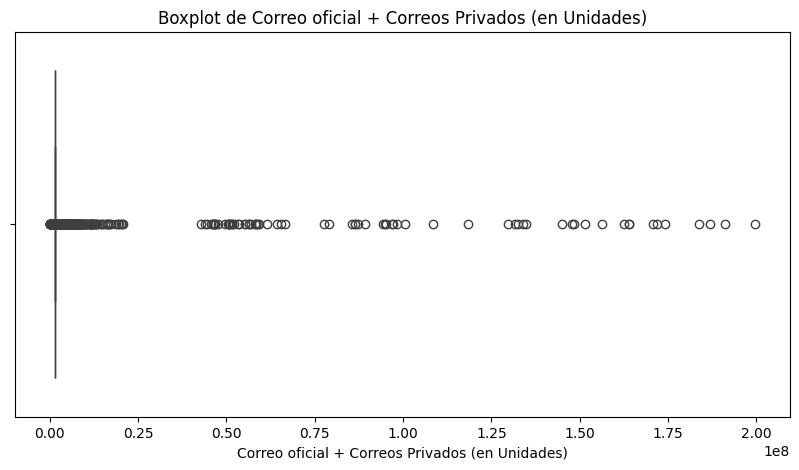

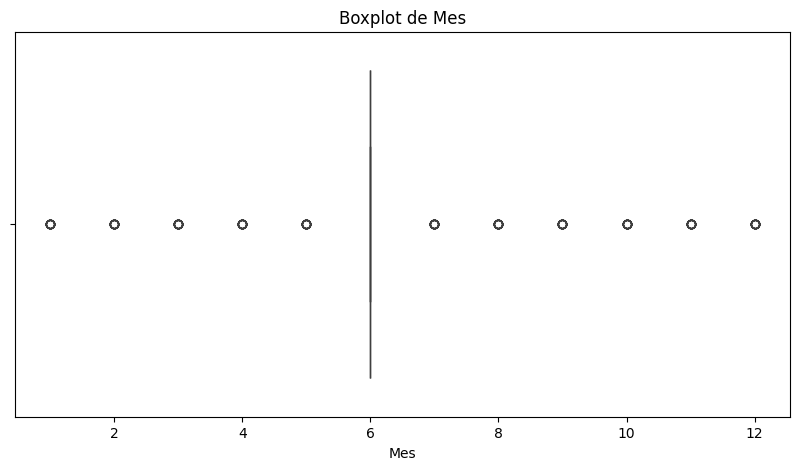

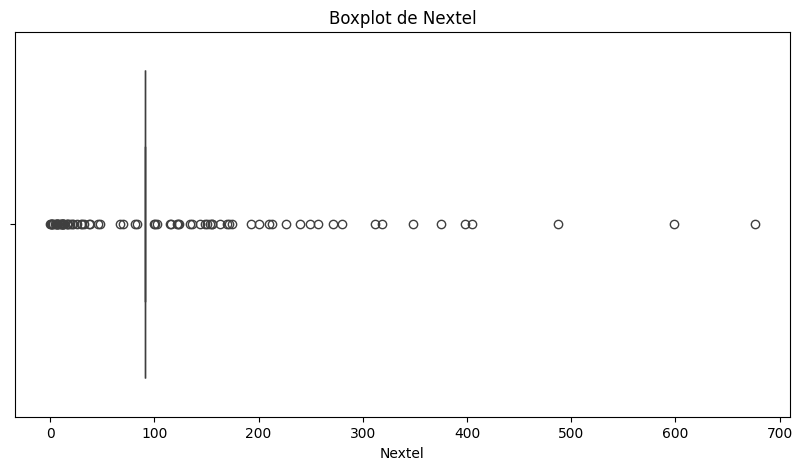

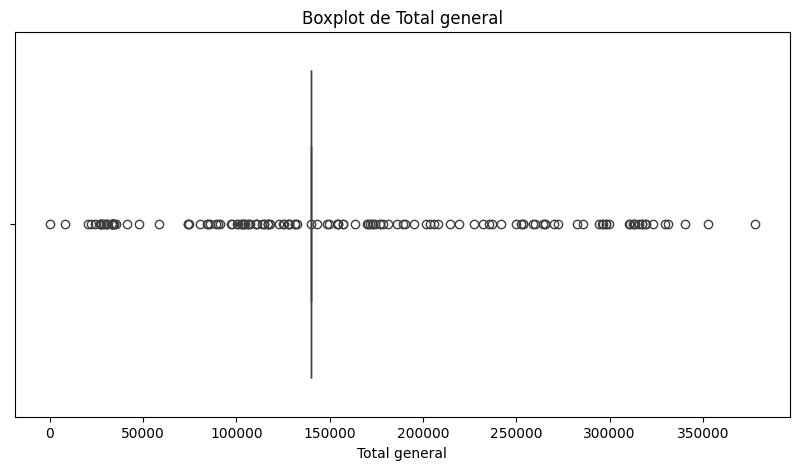

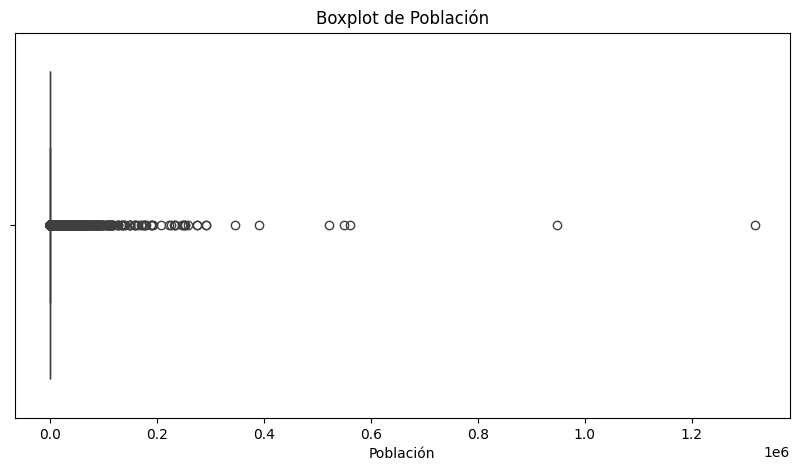

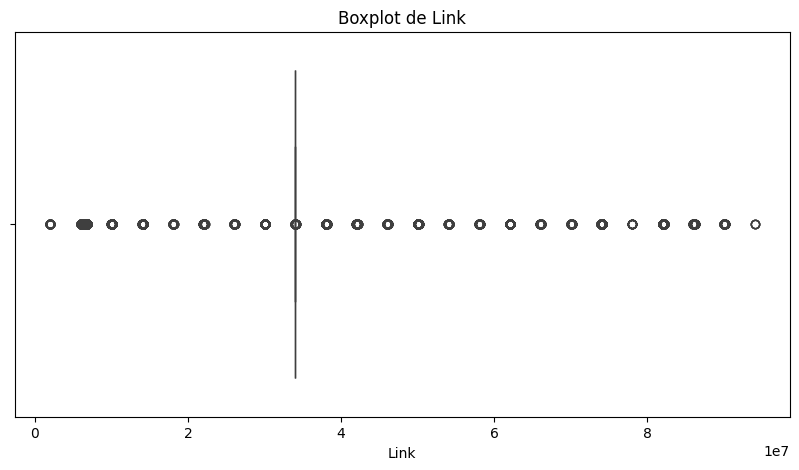

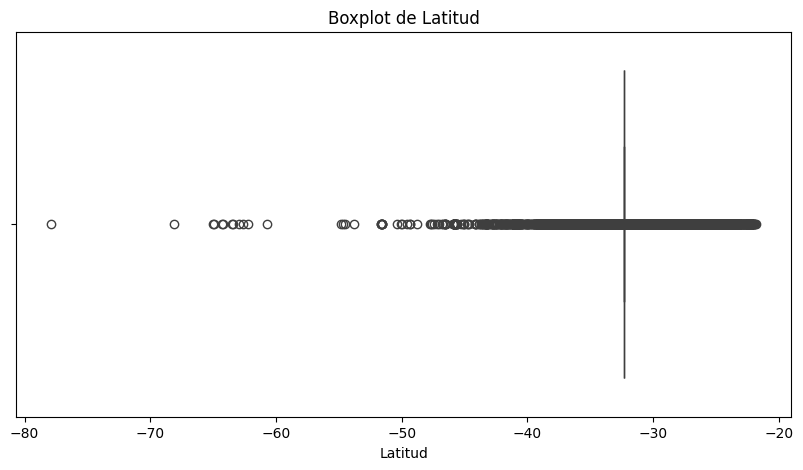

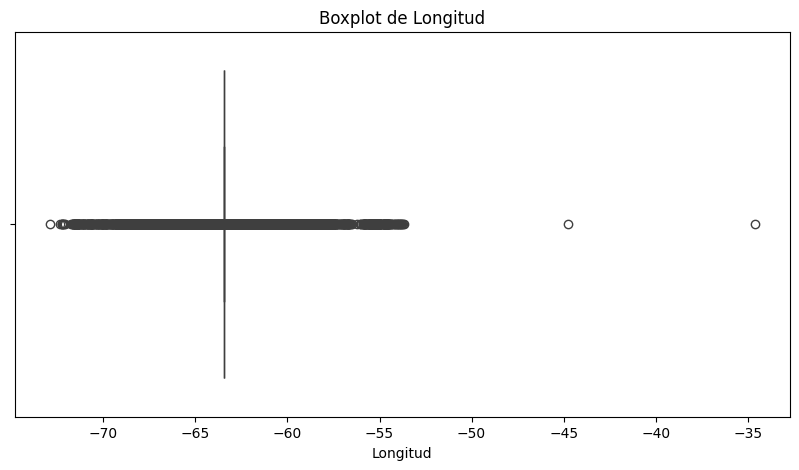

In [12]:
# Visualización de outliers
for col in numericas_columnas:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df_consolidado[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

Eliminación de otliers utilizando el rango Intercuartílico(IQR)

In [13]:
# Eliminar outliers utilizando el rango intercuartílico (IQR)
for col in numericas_columnas:
    Q1 = df_consolidado[col].quantile(0.25)
    Q3 = df_consolidado[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    df_consolidado = df_consolidado[(df_consolidado[col] >= lim_inf) & (df_consolidado[col] <= lim_sup)]

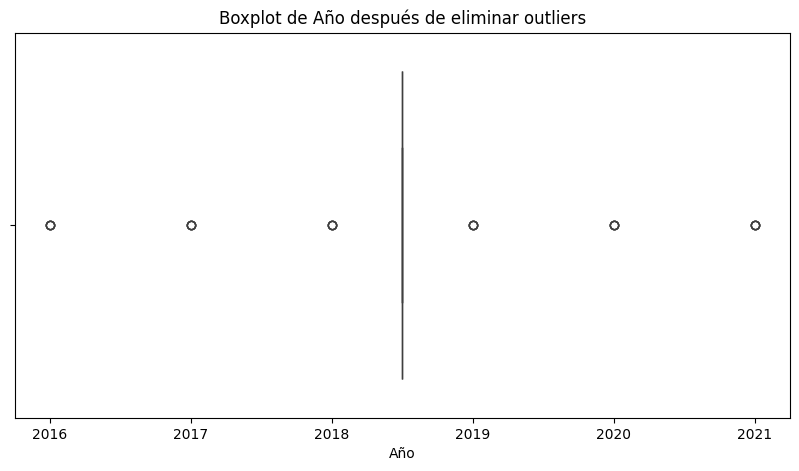

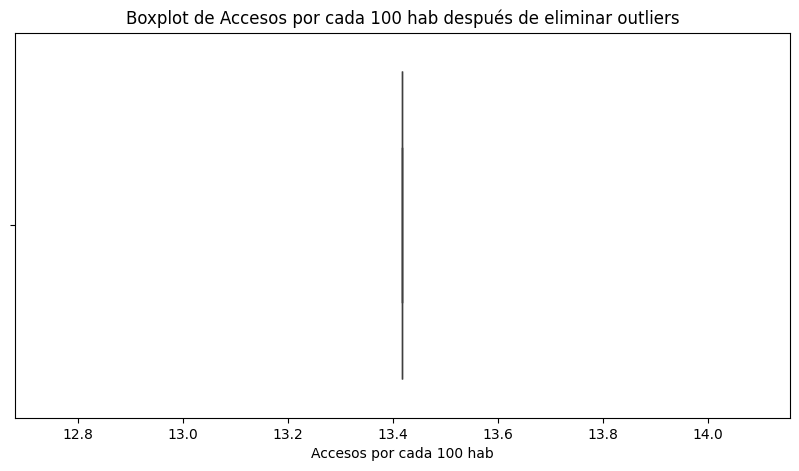

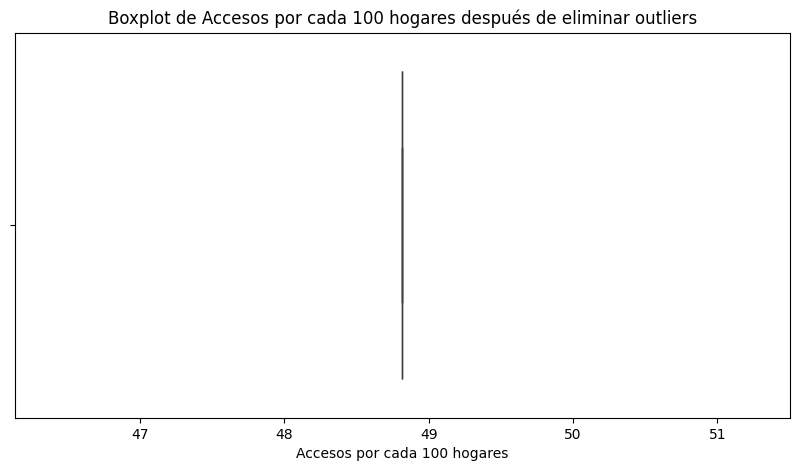

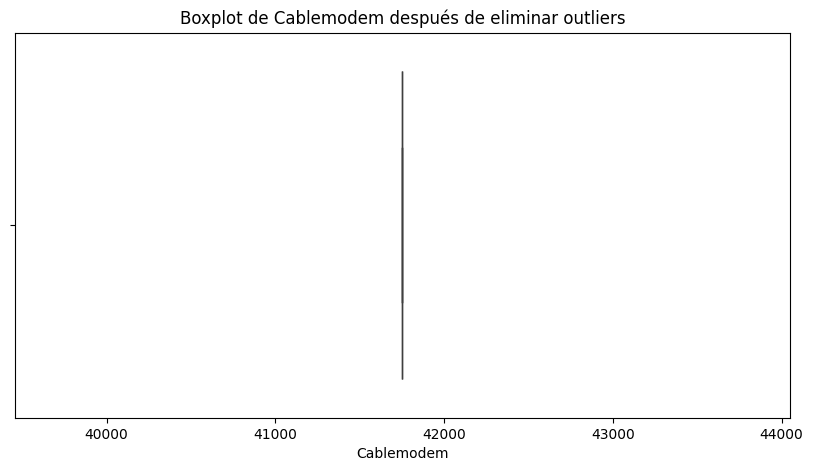

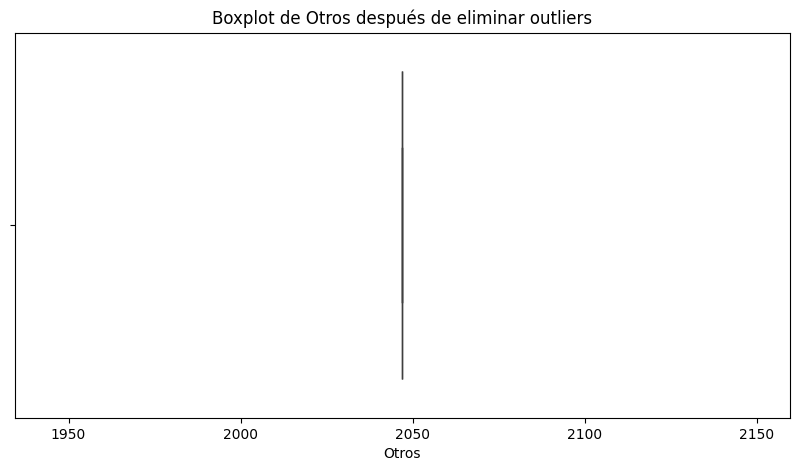

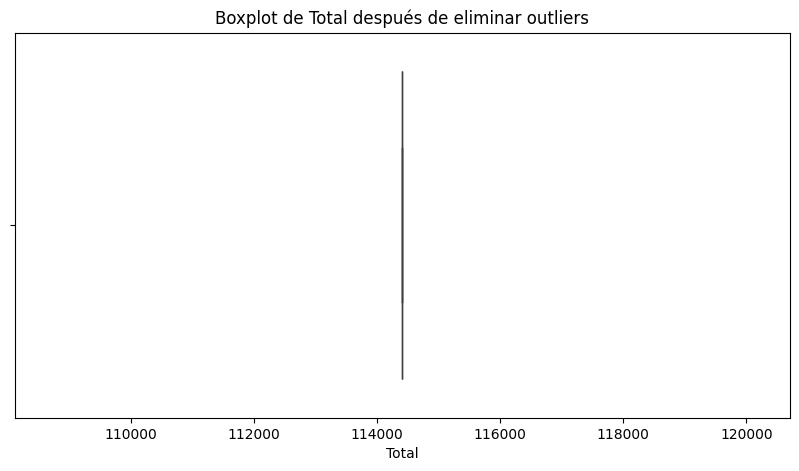

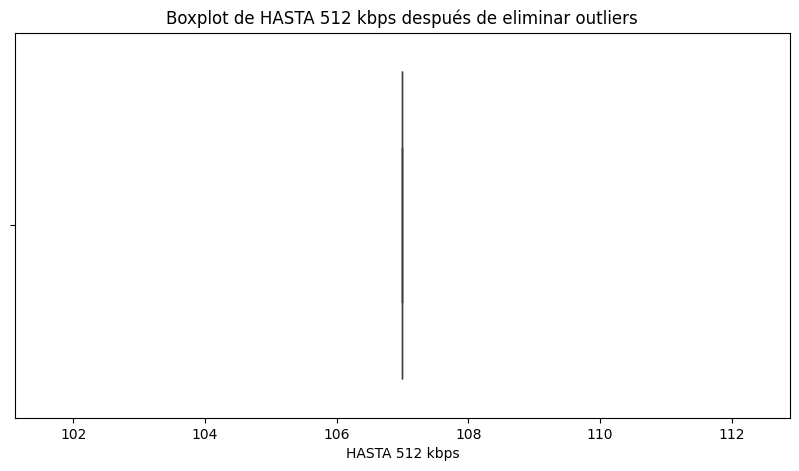

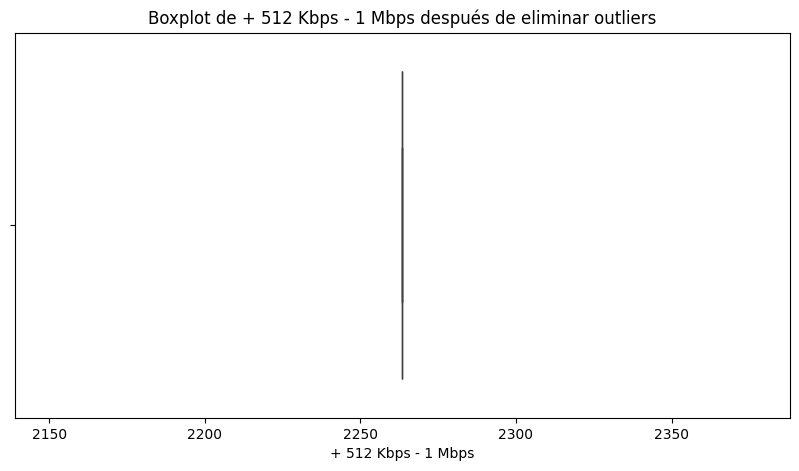

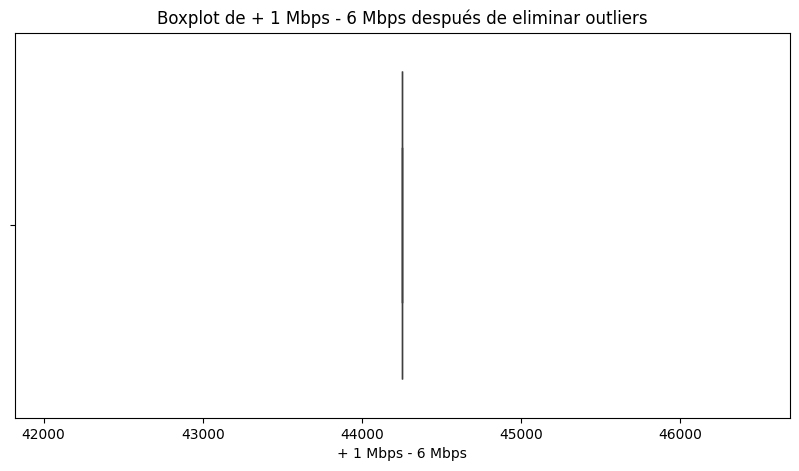

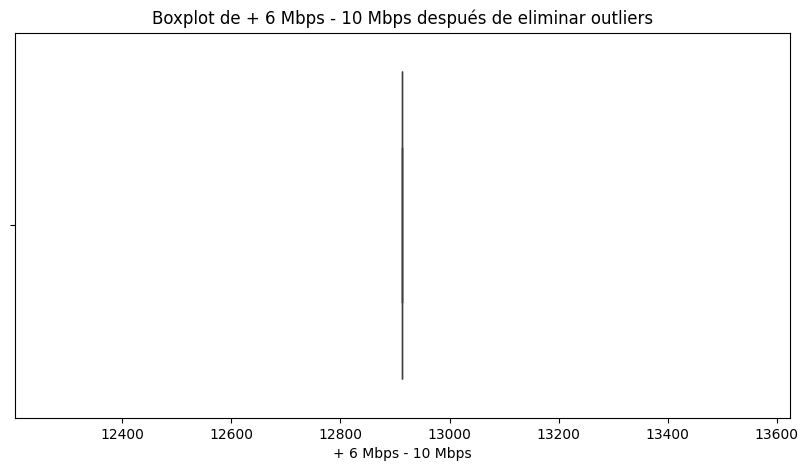

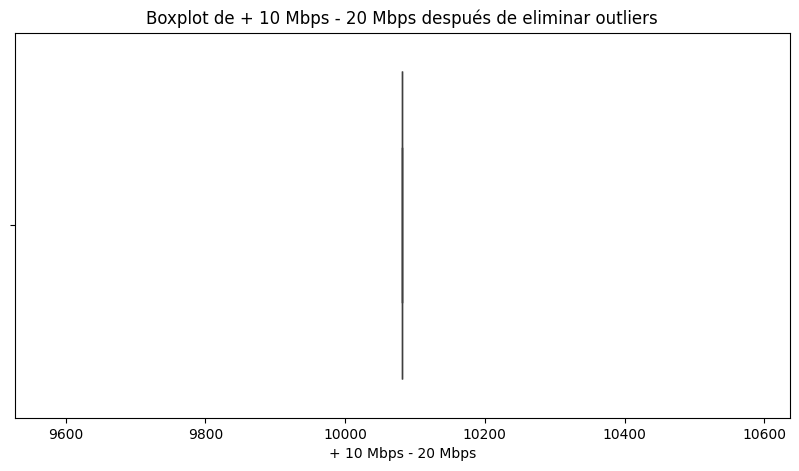

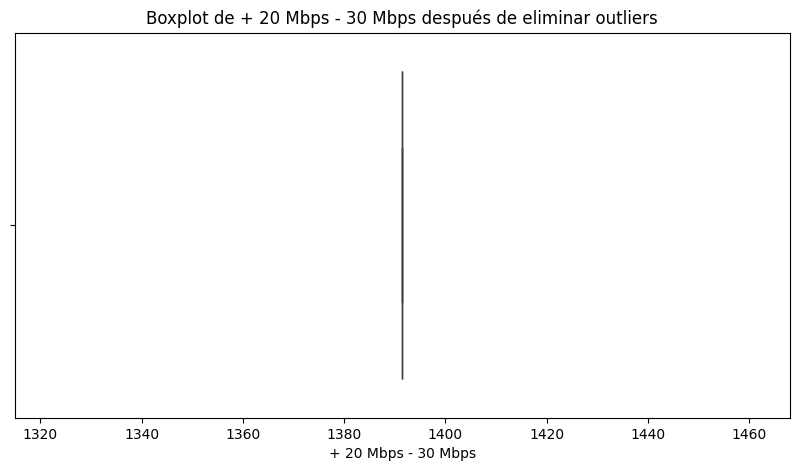

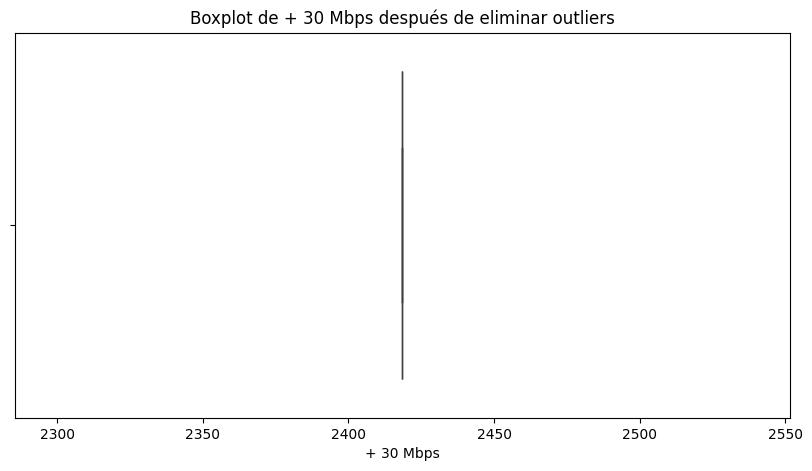

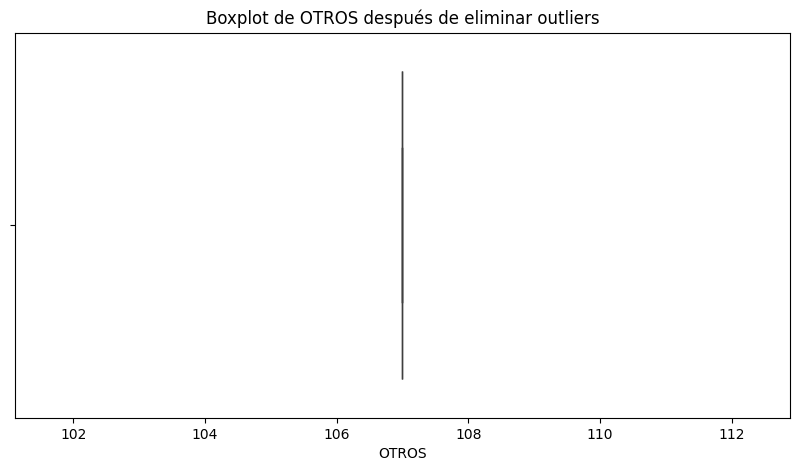

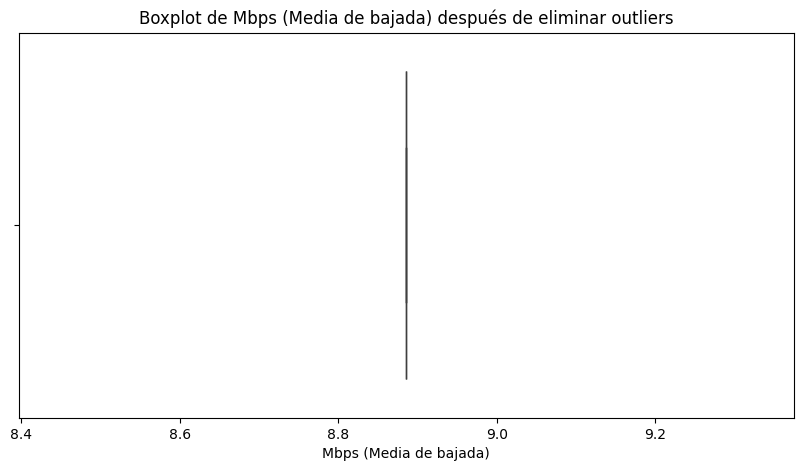

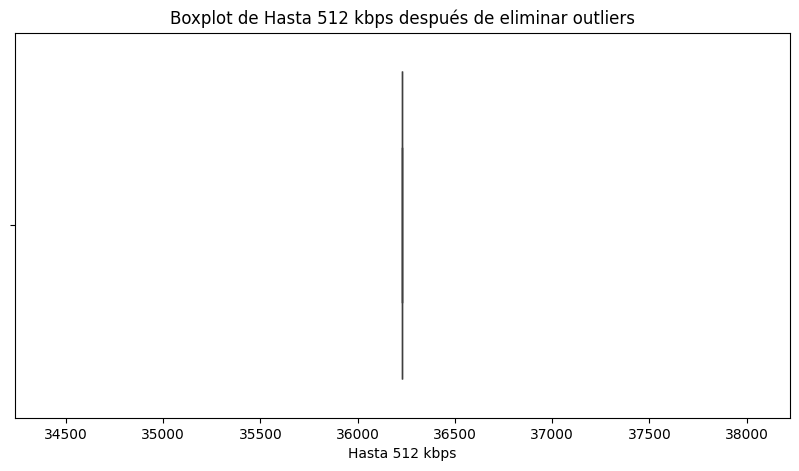

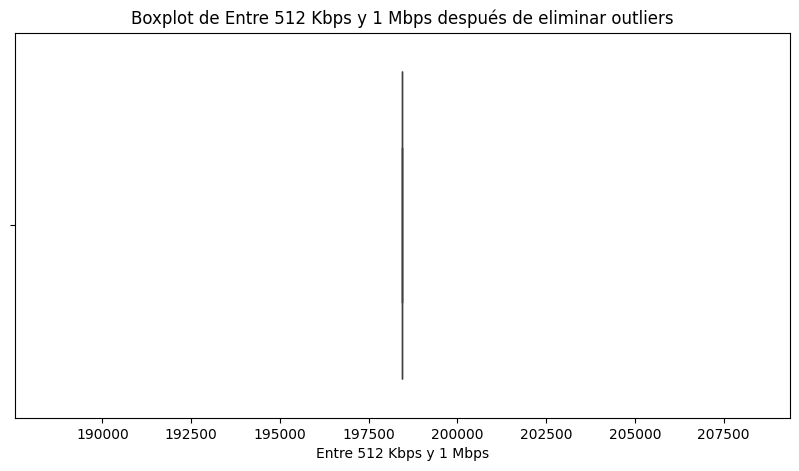

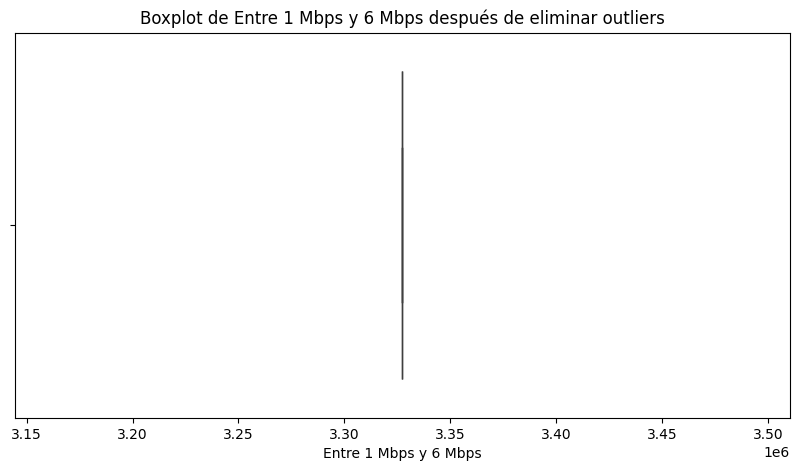

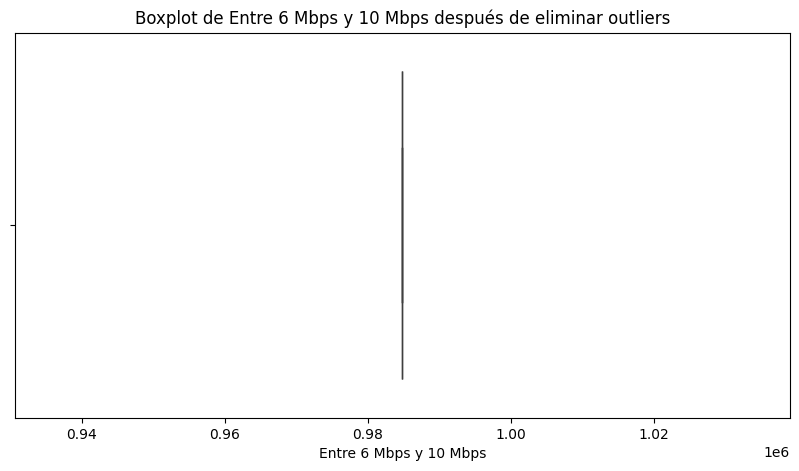

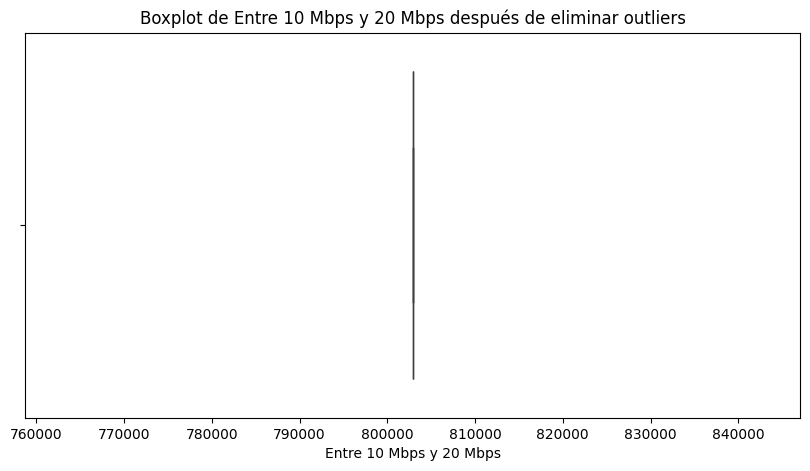

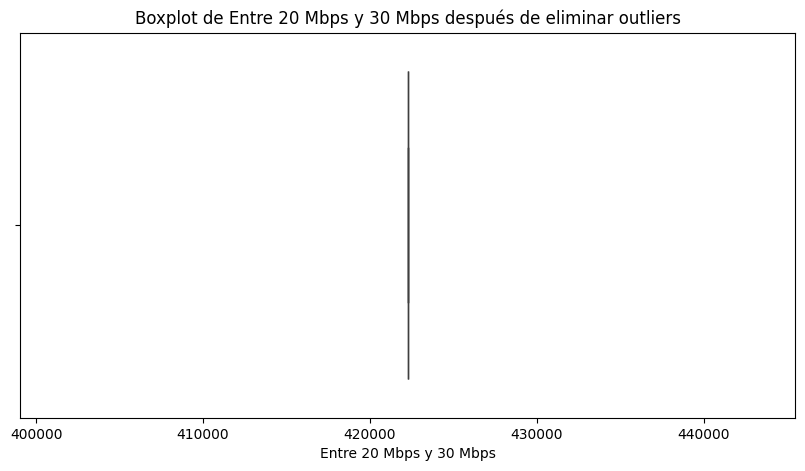

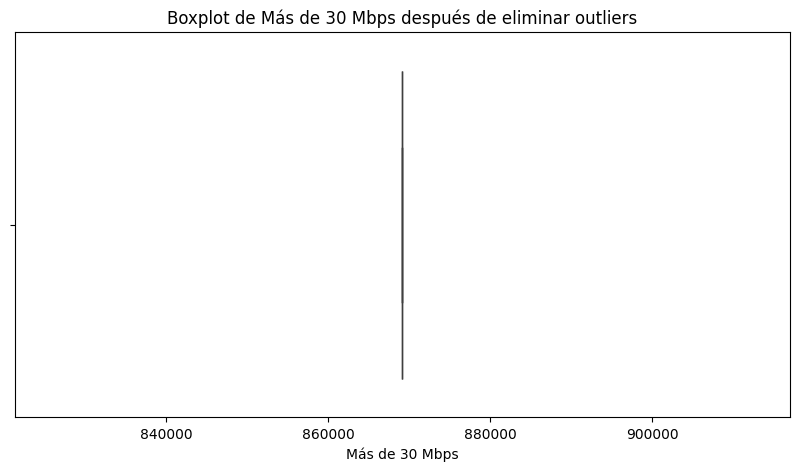

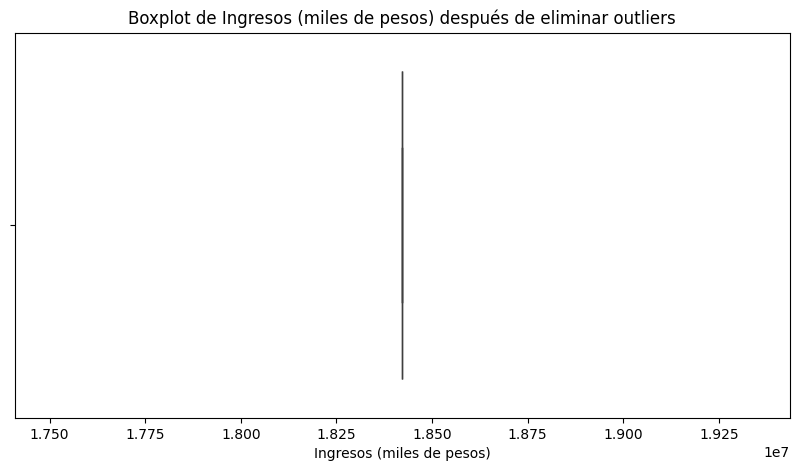

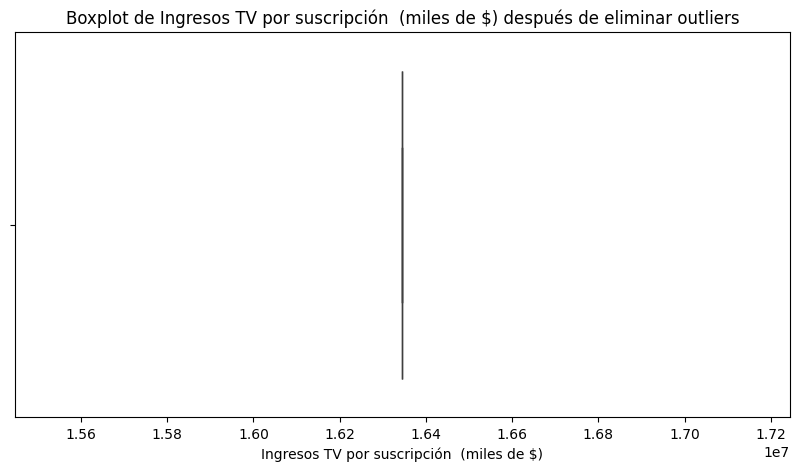

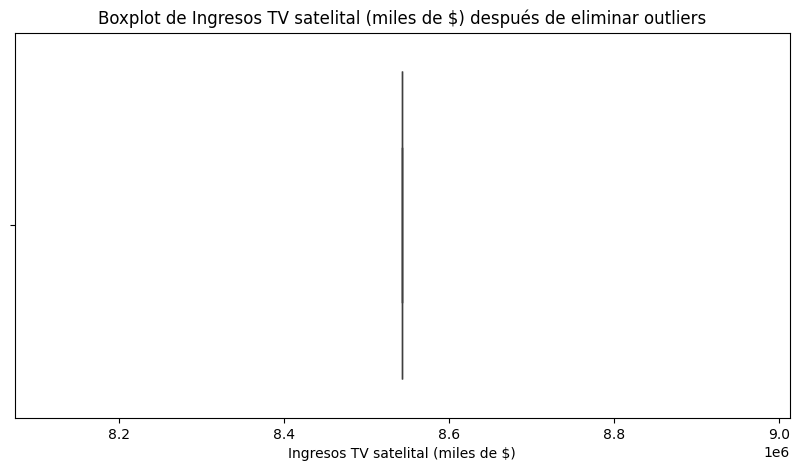

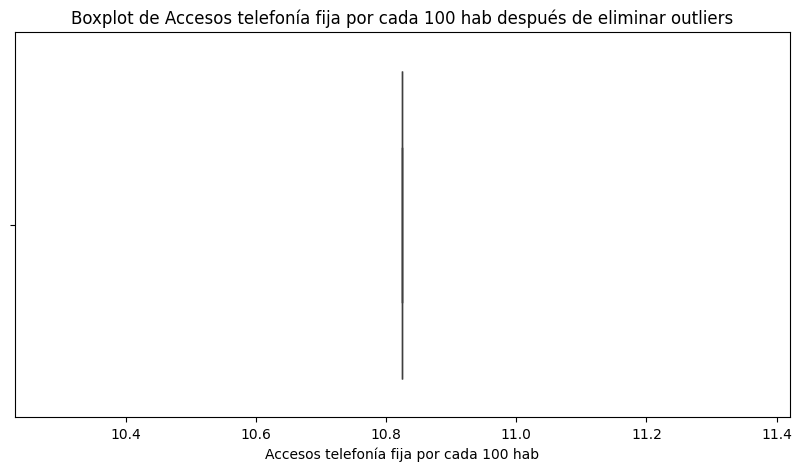

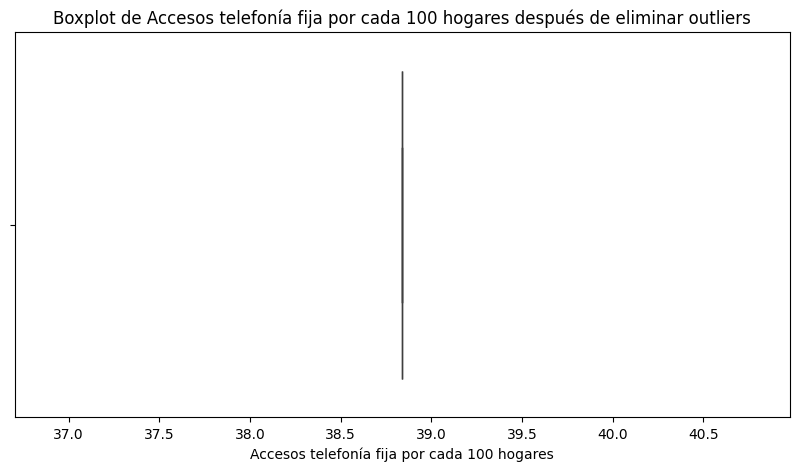

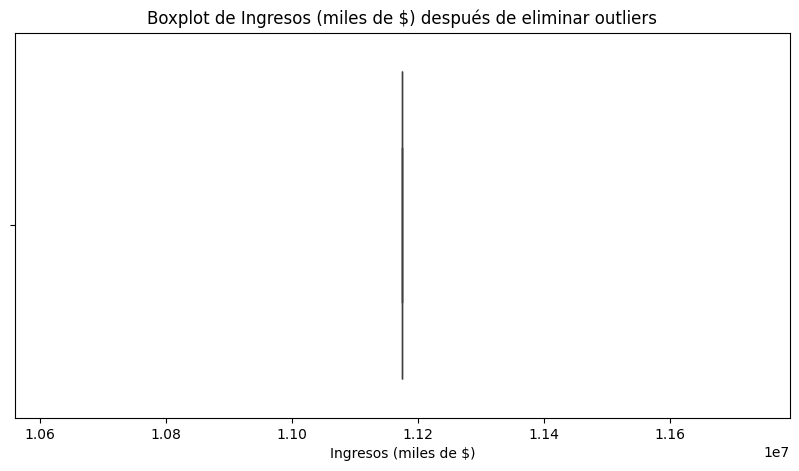

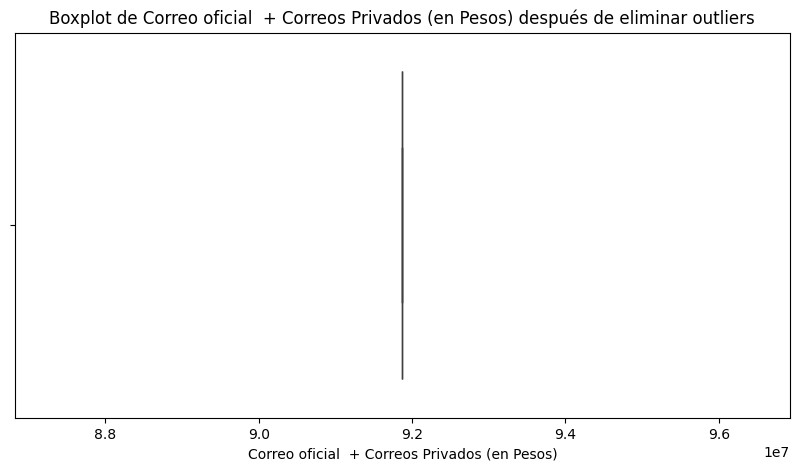

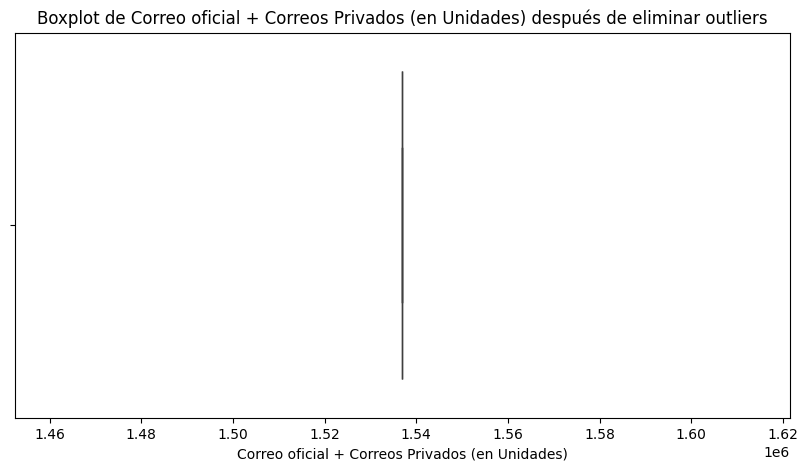

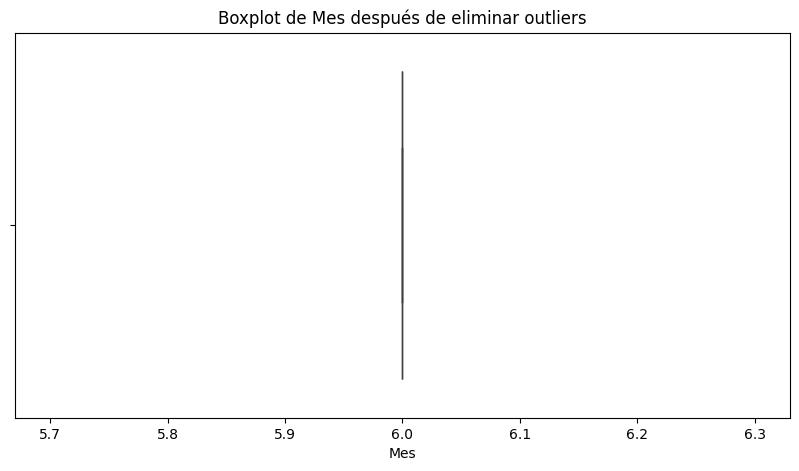

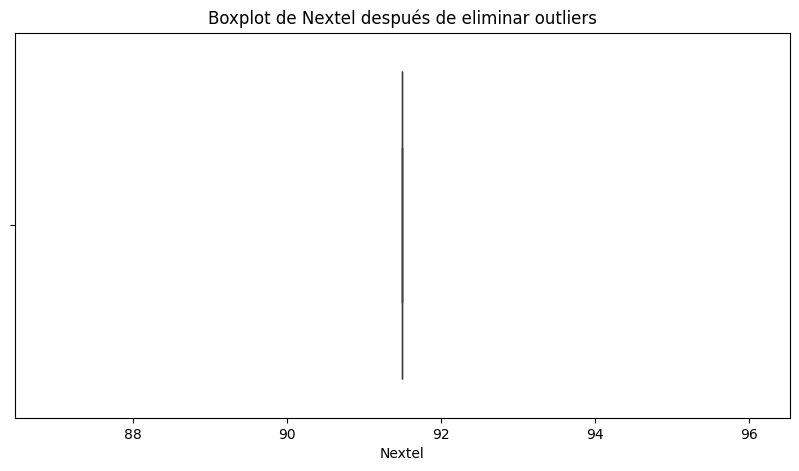

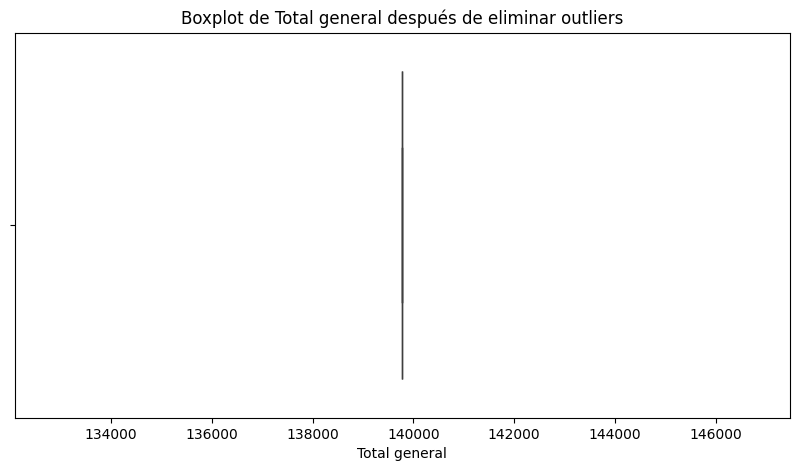

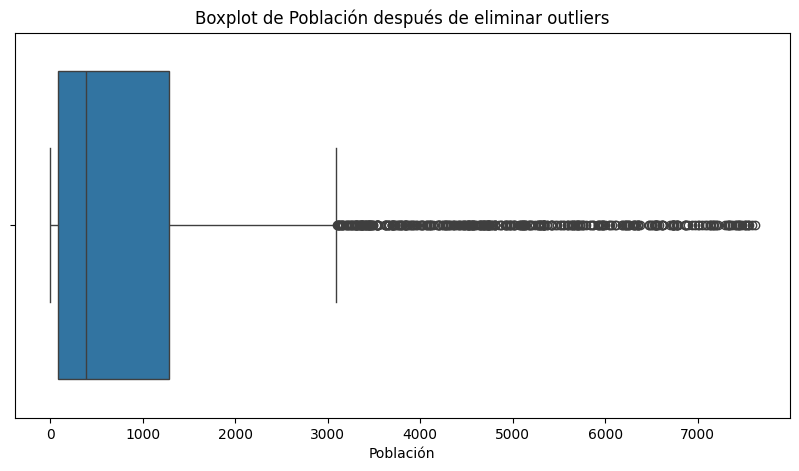

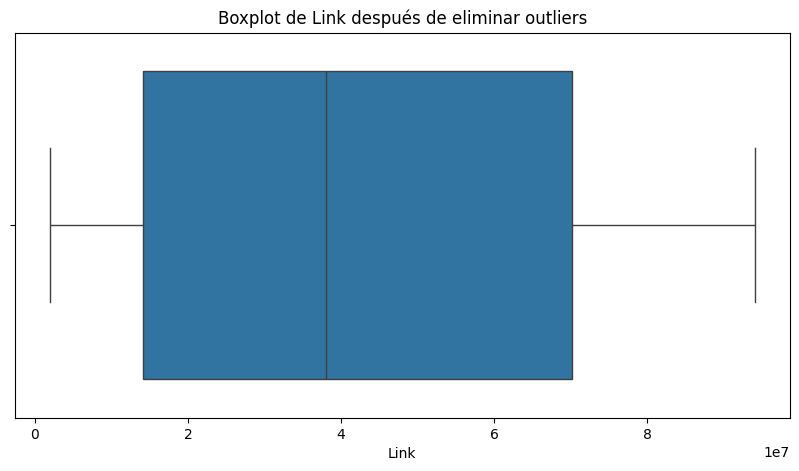

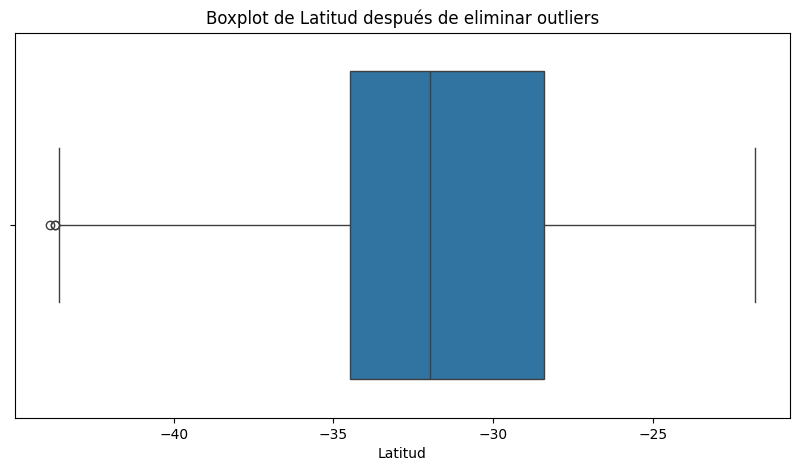

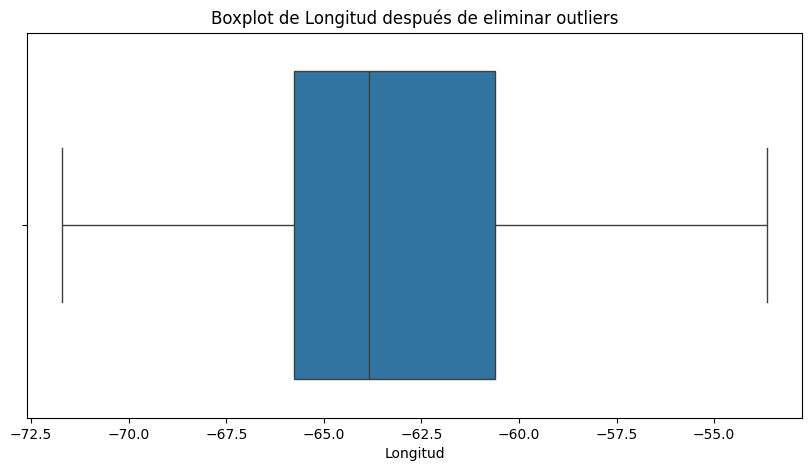

In [14]:
# Visualizar datos después de eliminar outliers
for col in numericas_columnas:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df_consolidado[col])
    plt.title(f'Boxplot de {col} después de eliminar outliers')
    plt.show()

Finalmente, creamos visualizaciones para explorar las relaciones entre las variables y derivar conclusiones.Se utilizan gráficos de dispersión, histogramas, y gráficos de barras según el tipo de variable (cuantitativa o cualitativa).


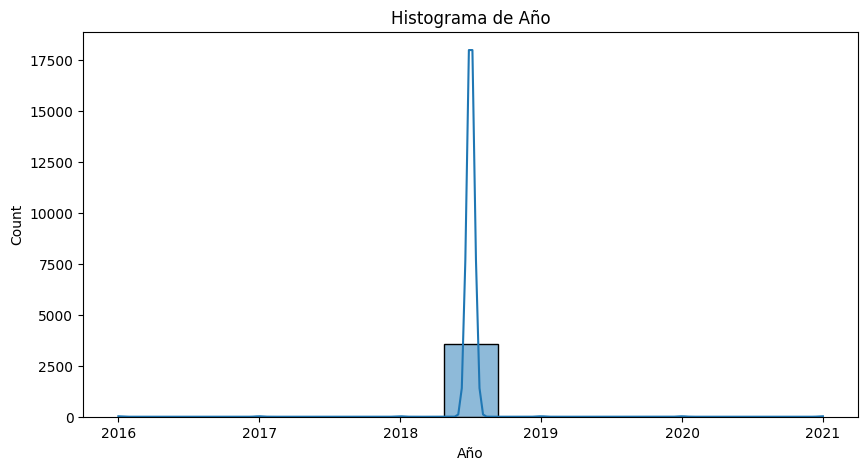

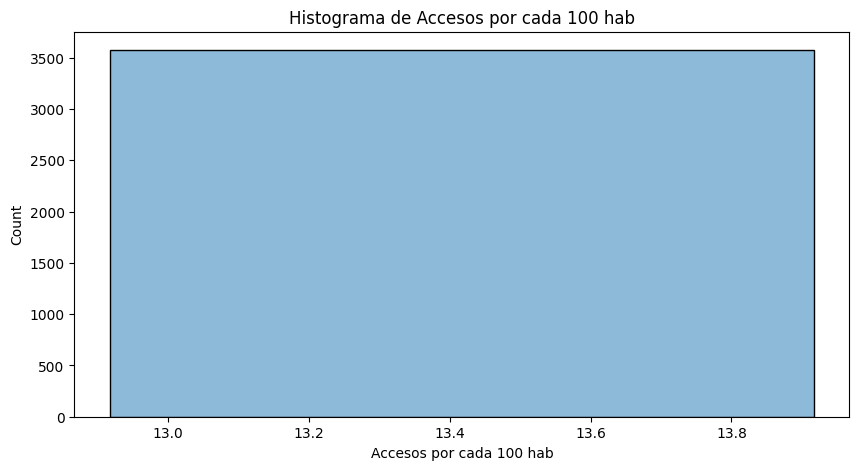

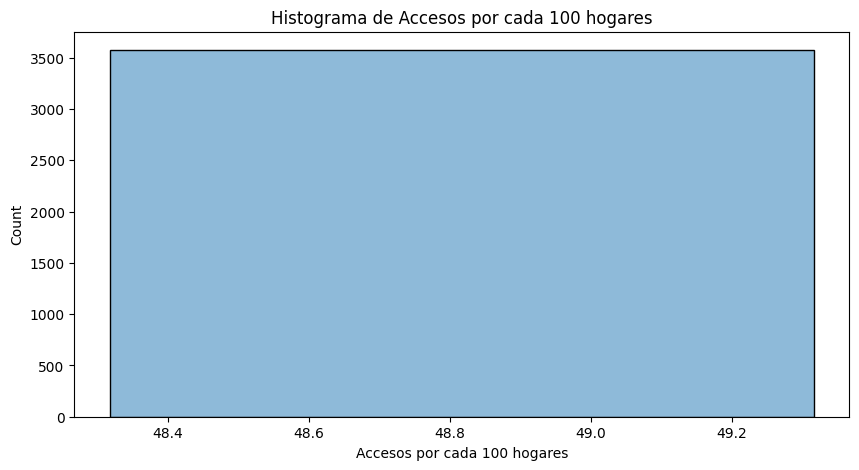

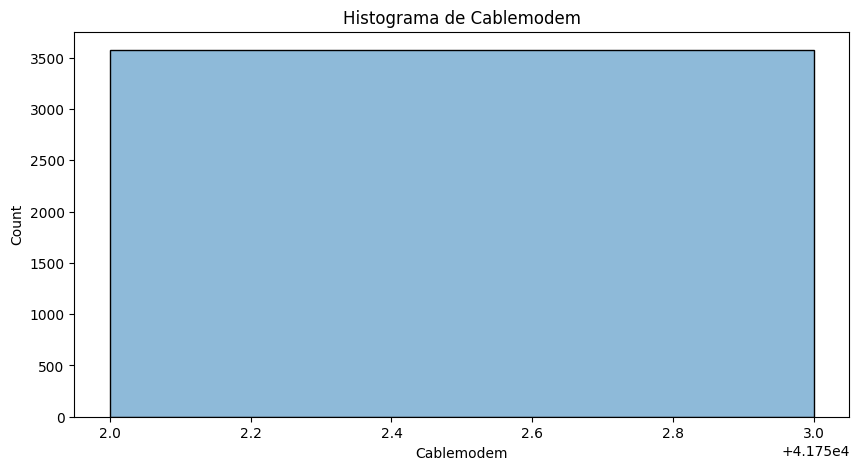

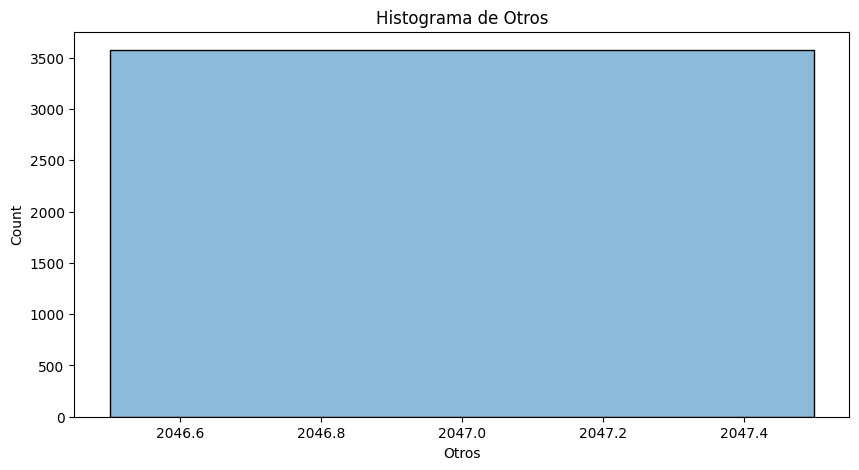

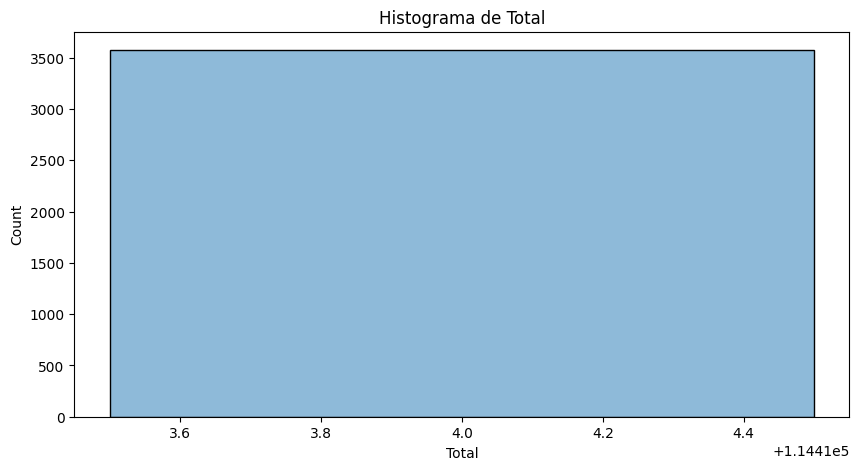

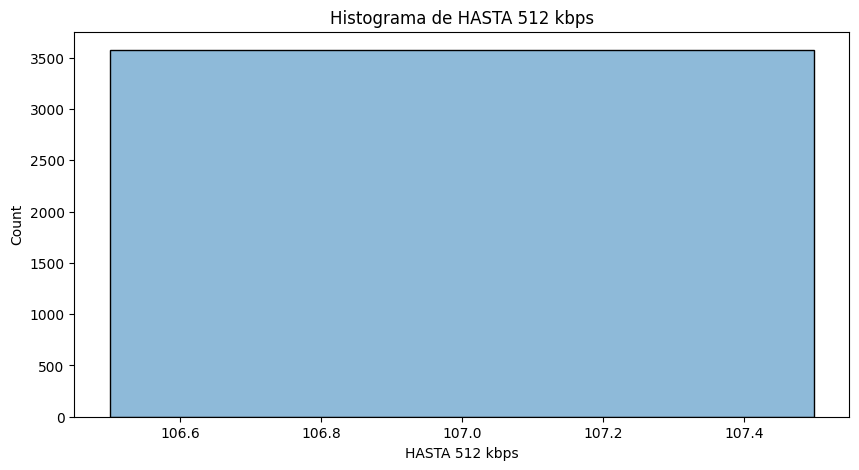

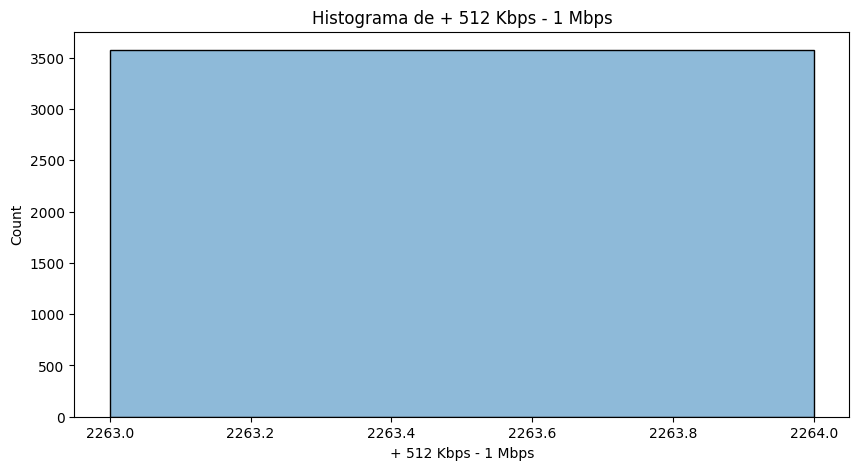

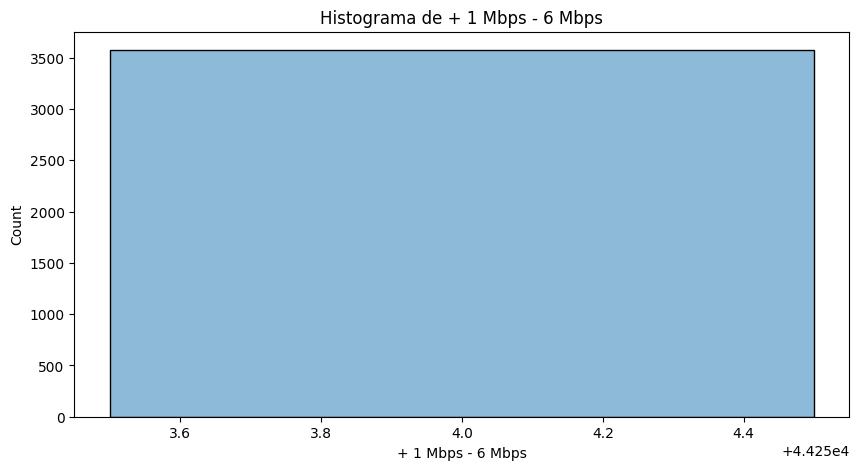

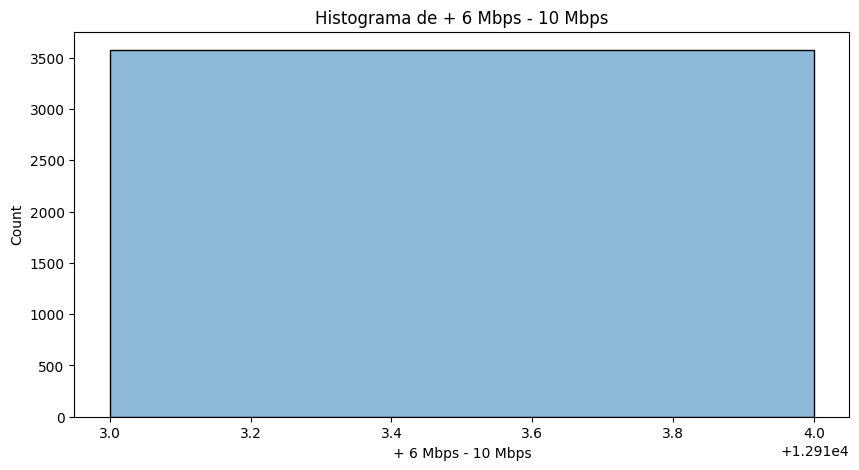

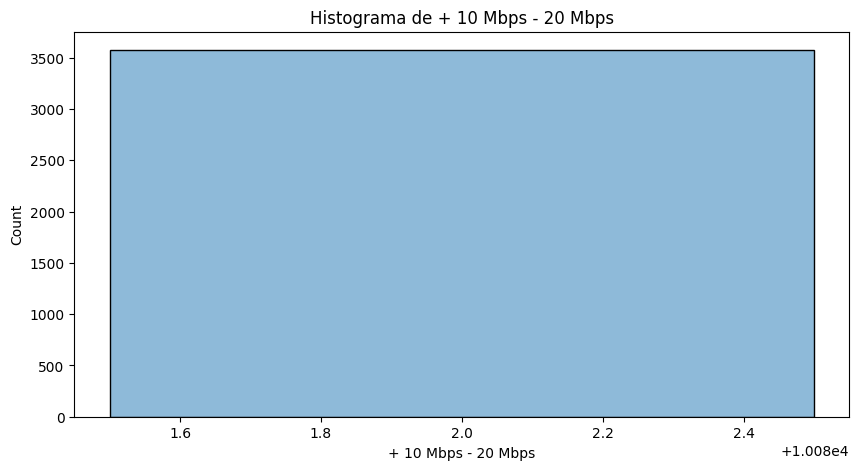

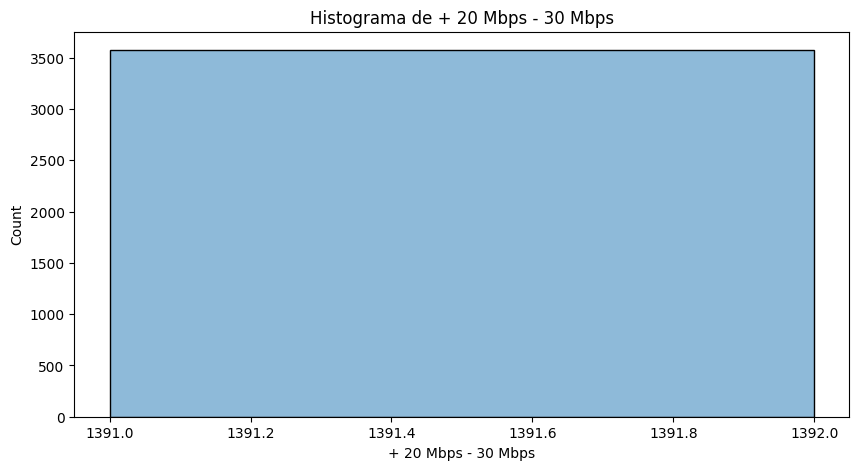

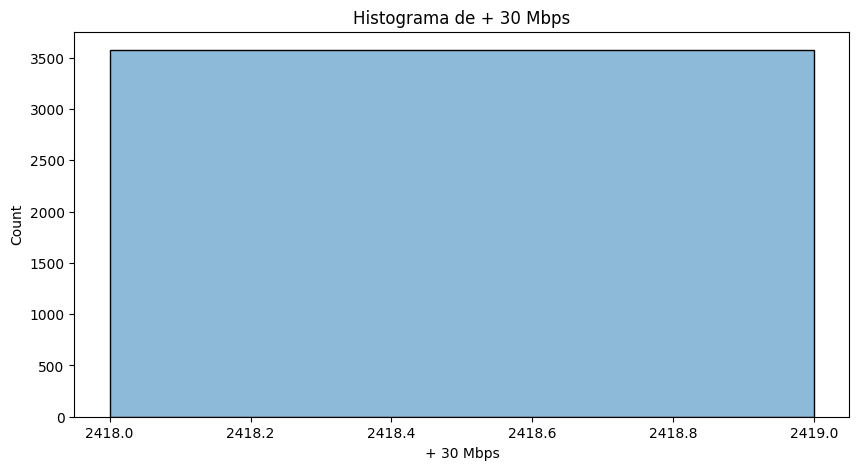

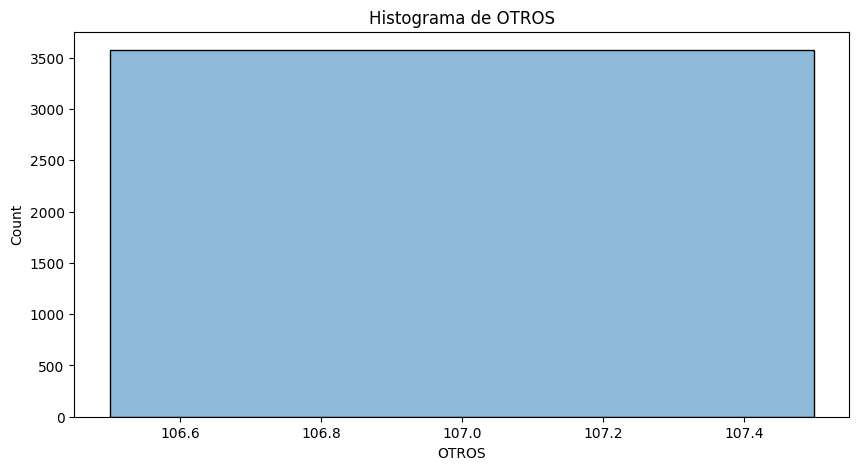

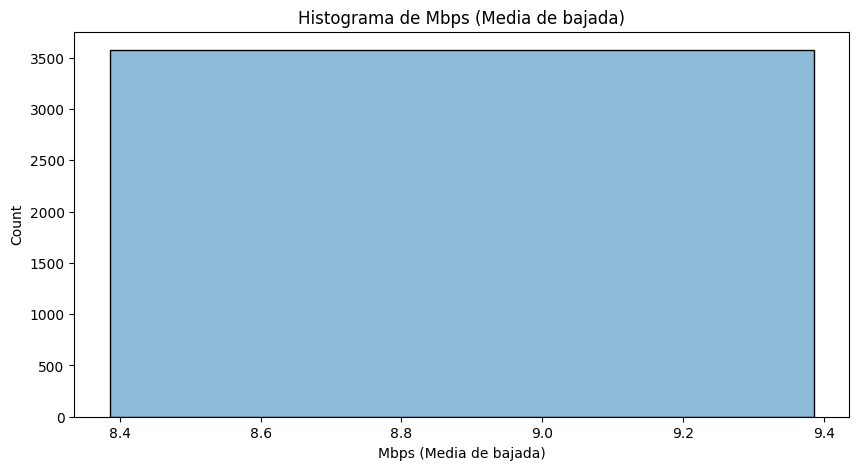

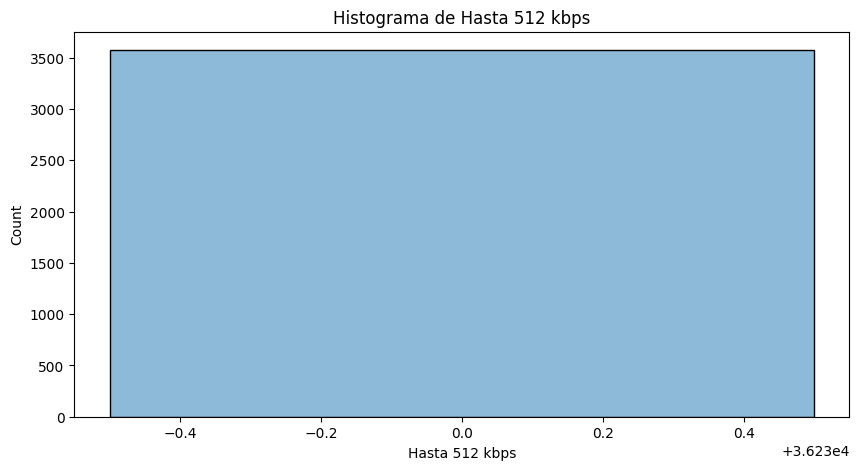

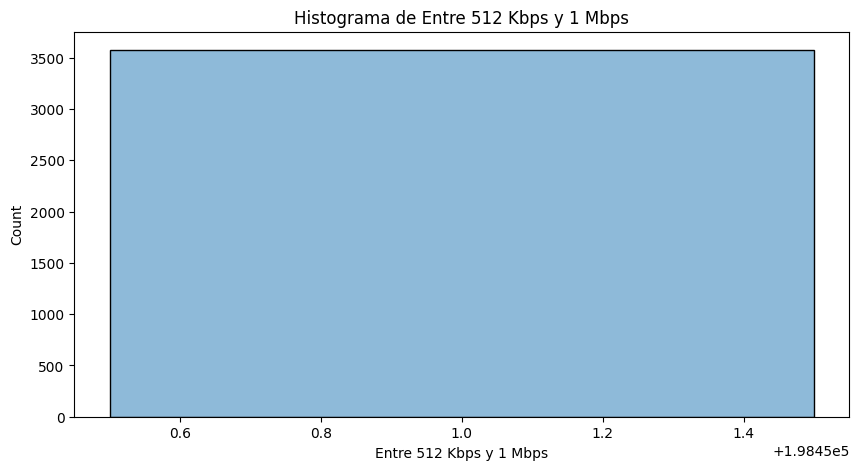

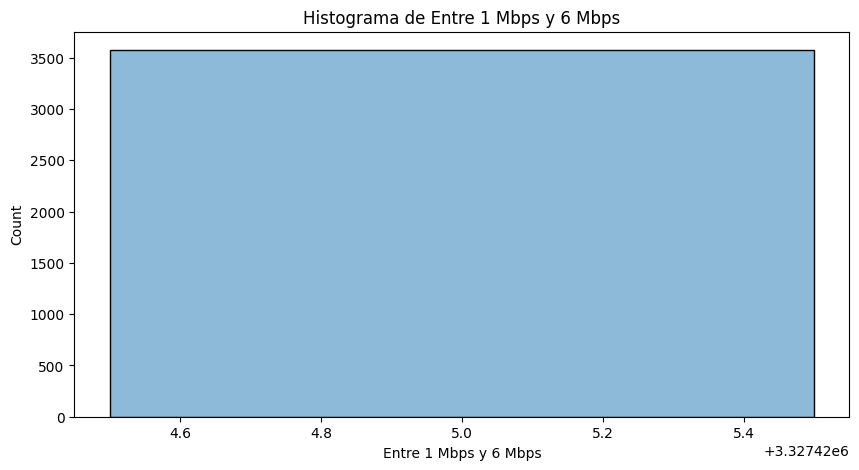

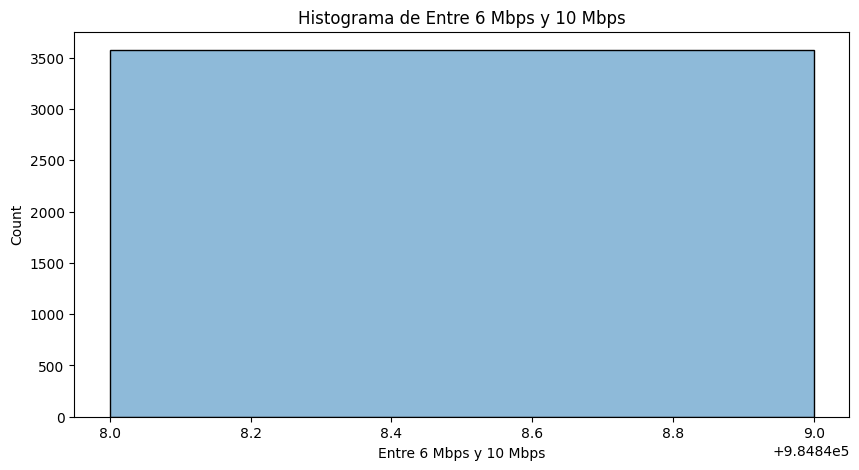

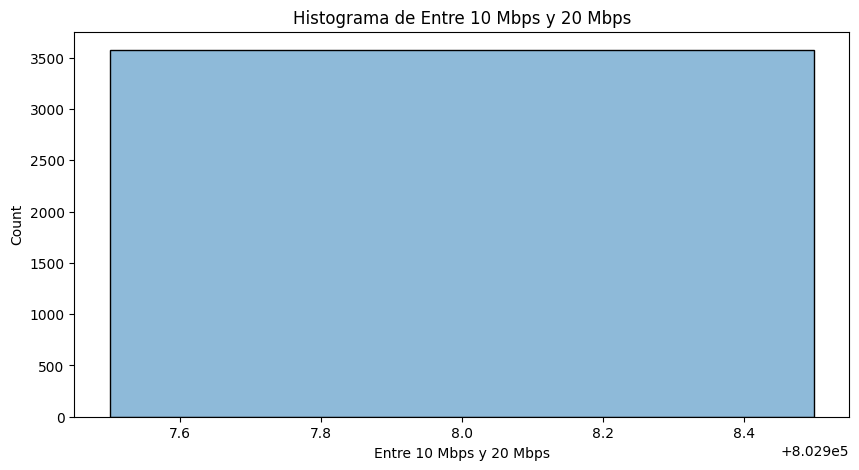

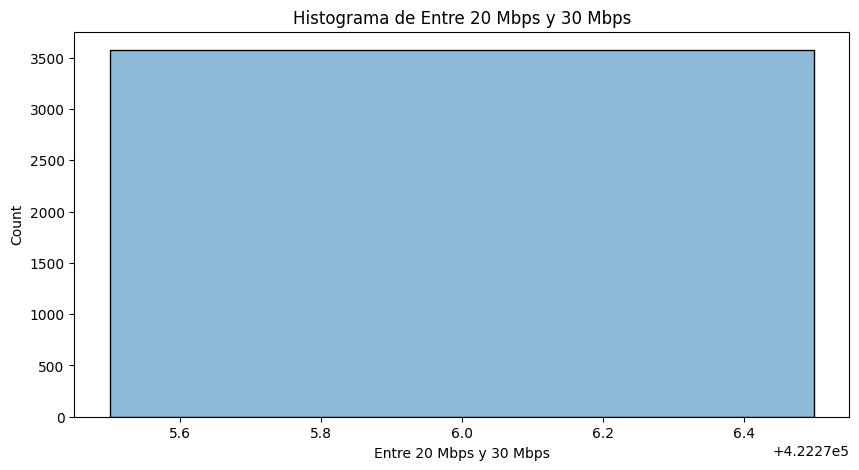

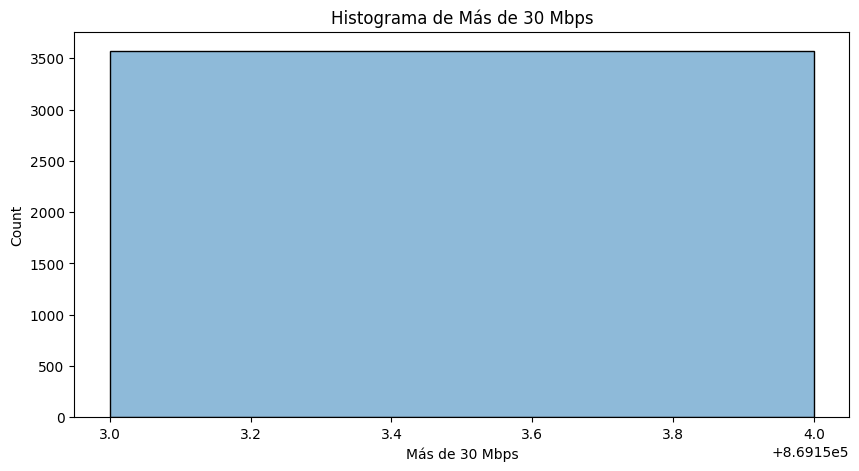

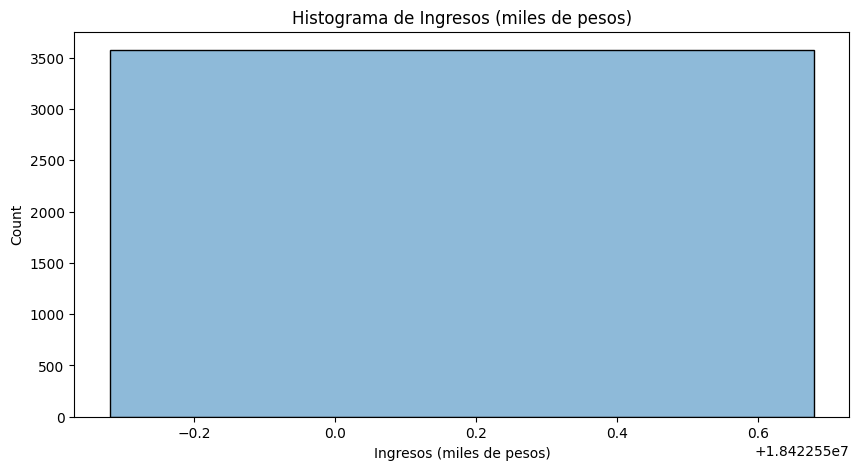

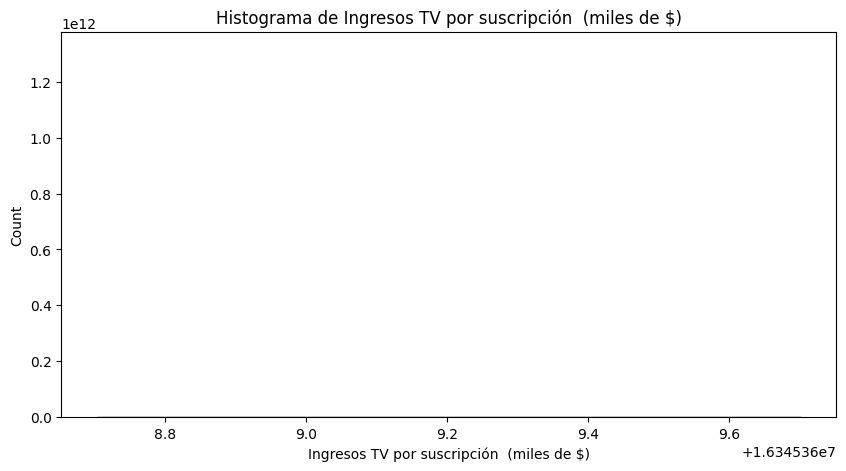

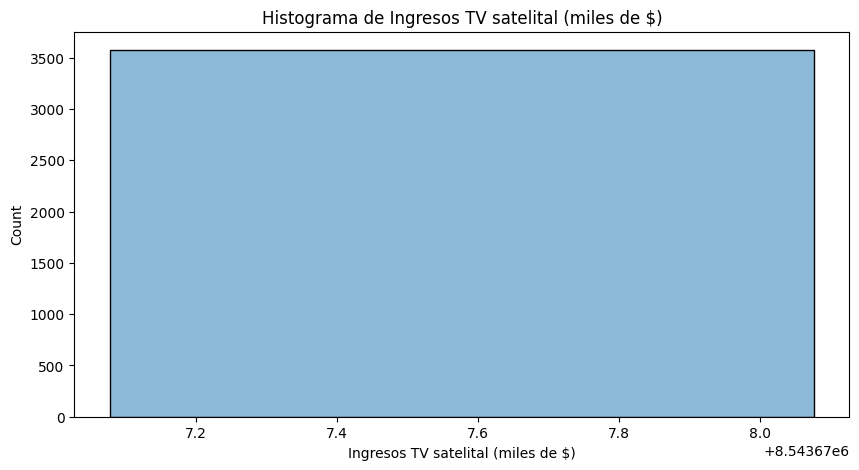

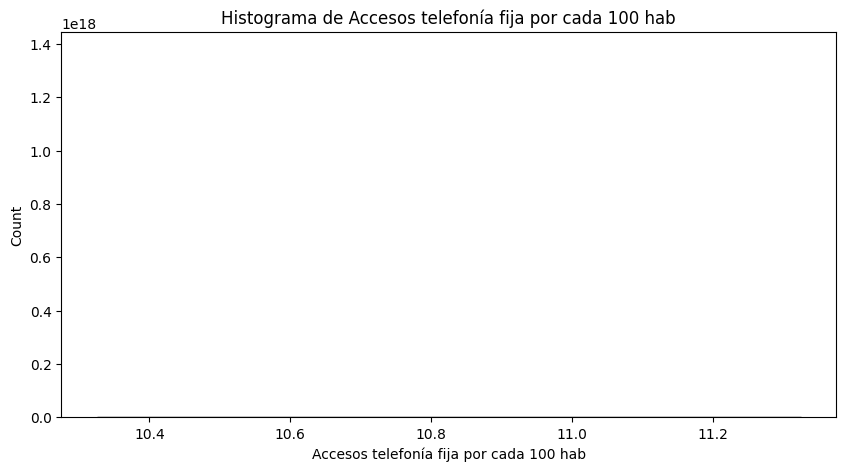

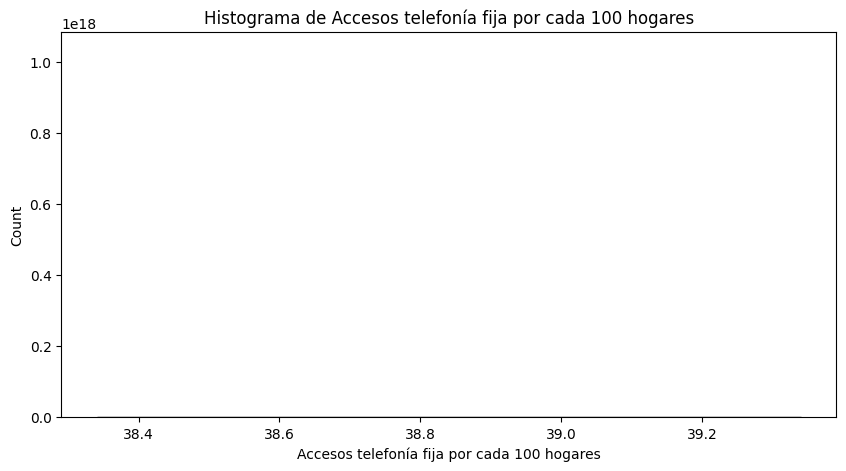

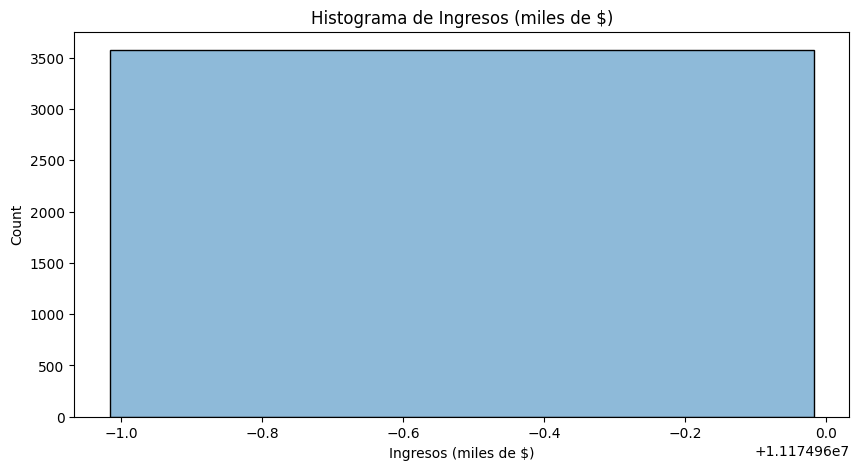

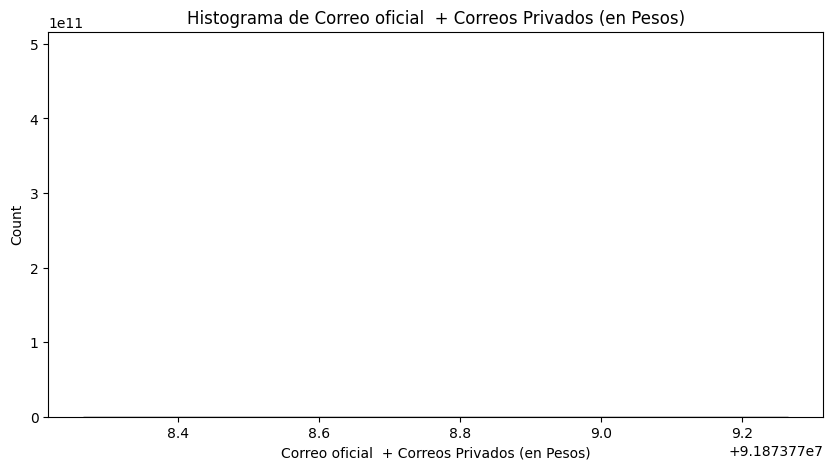

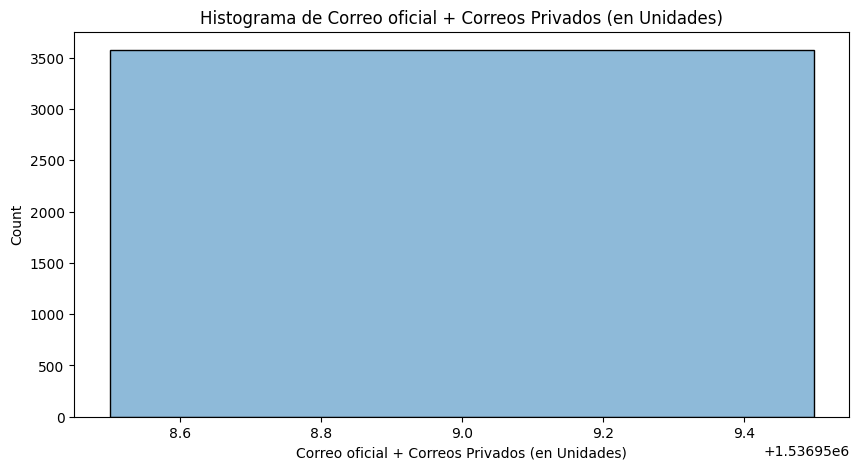

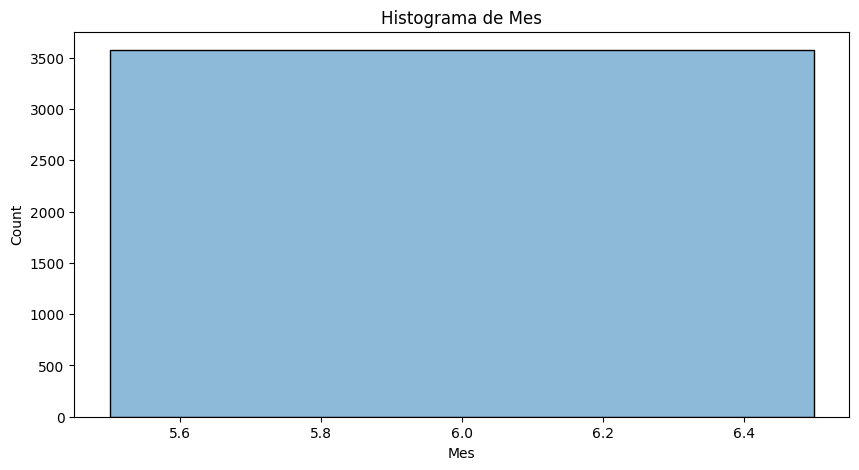

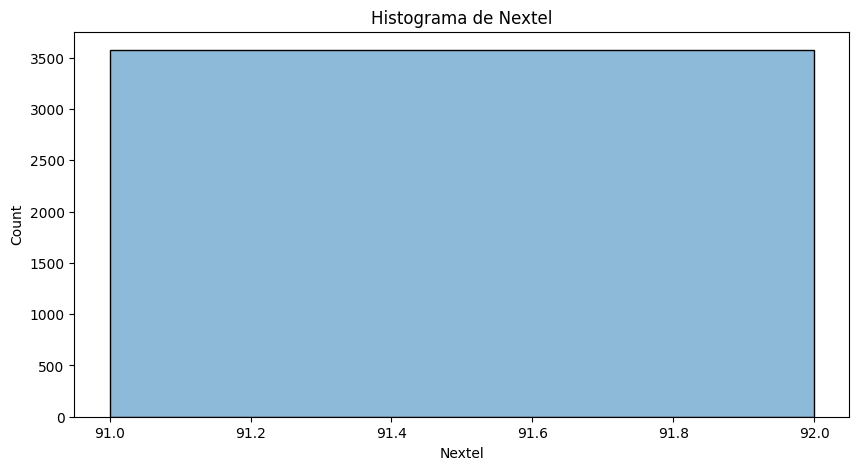

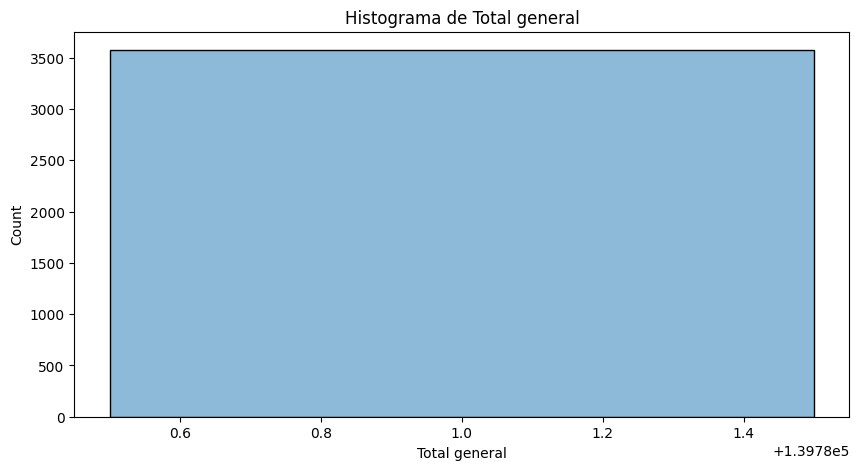

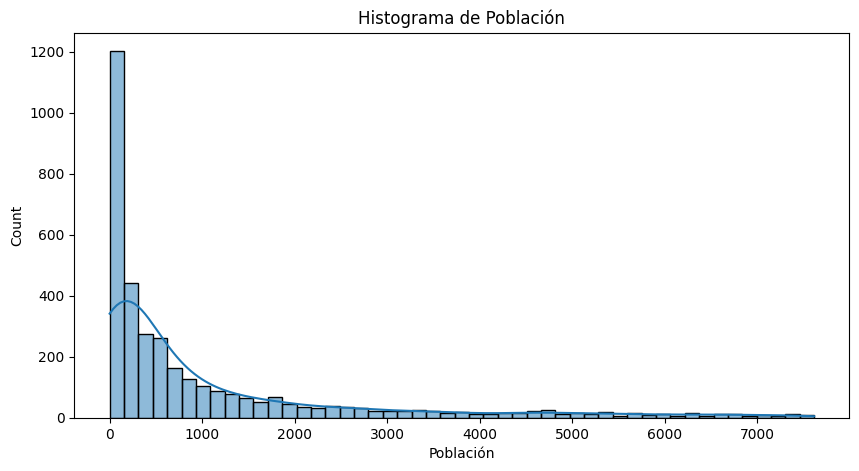

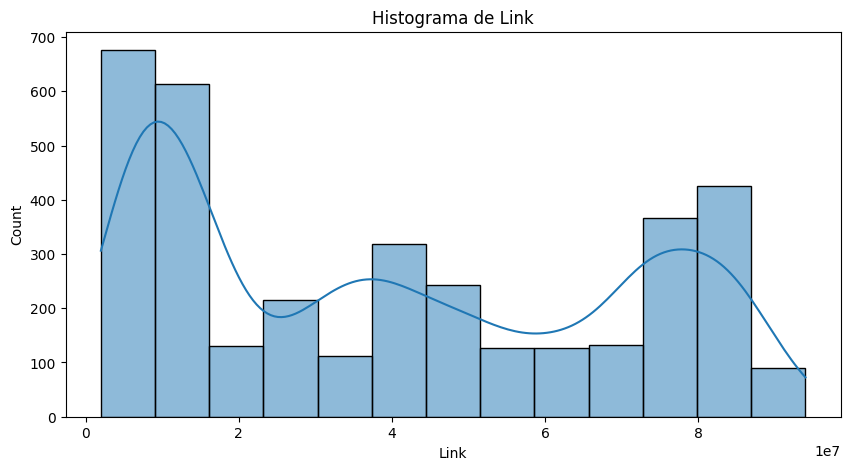

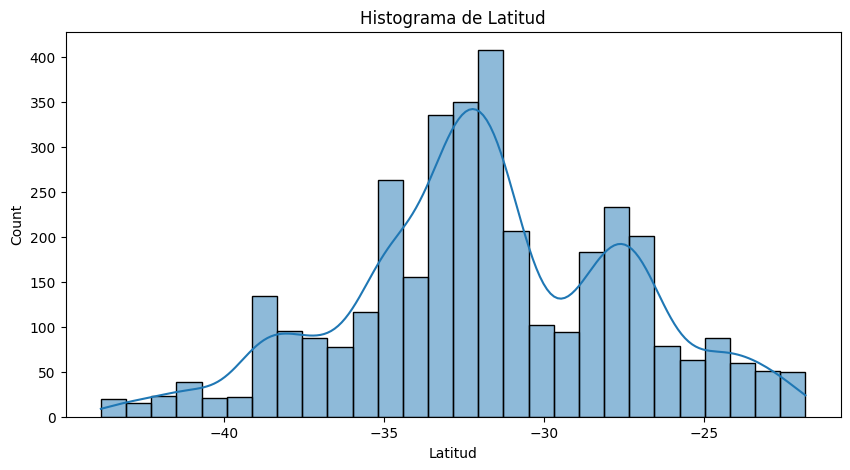

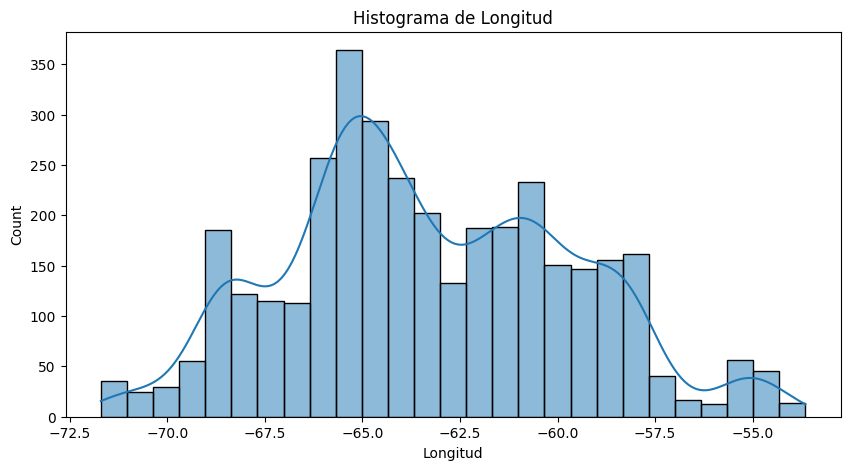

In [15]:
# Gráficos de dispersión para variables numéricas
for col in numericas_columnas:
    plt.figure(figsize=(10, 5))
    sns.histplot(df_consolidado[col], kde=True)
    plt.title(f'Histograma de {col}')
    plt.show()

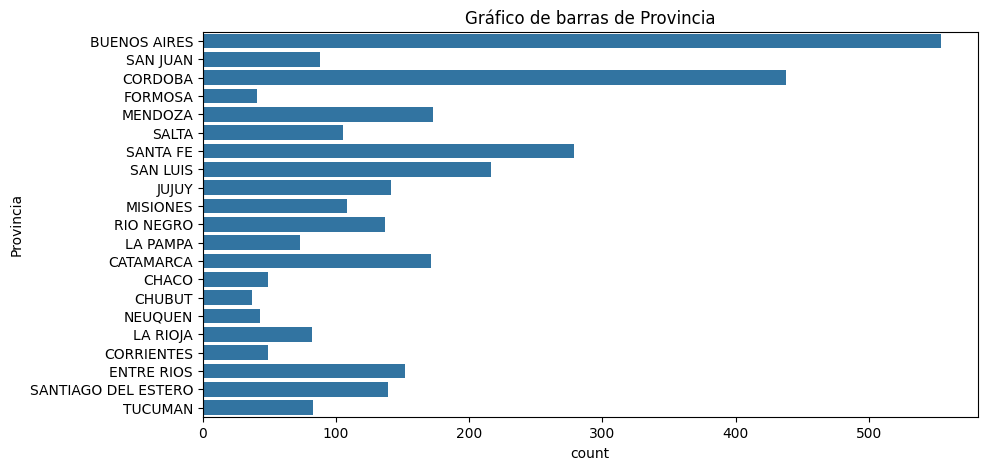

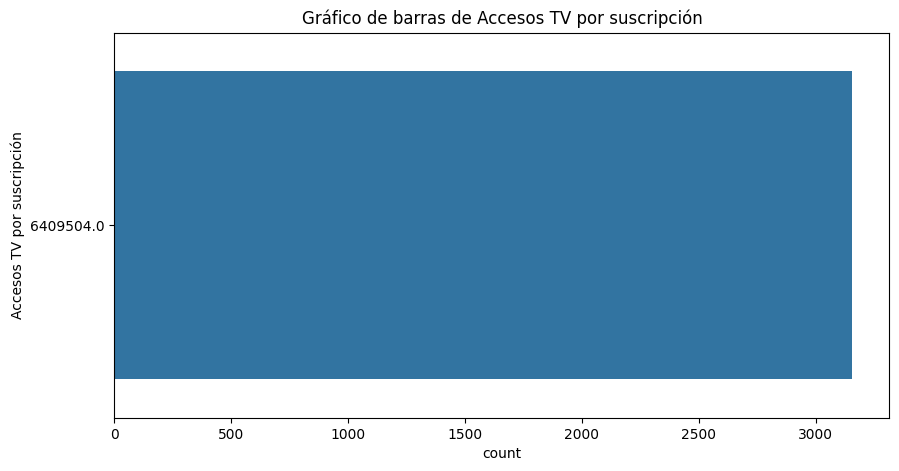

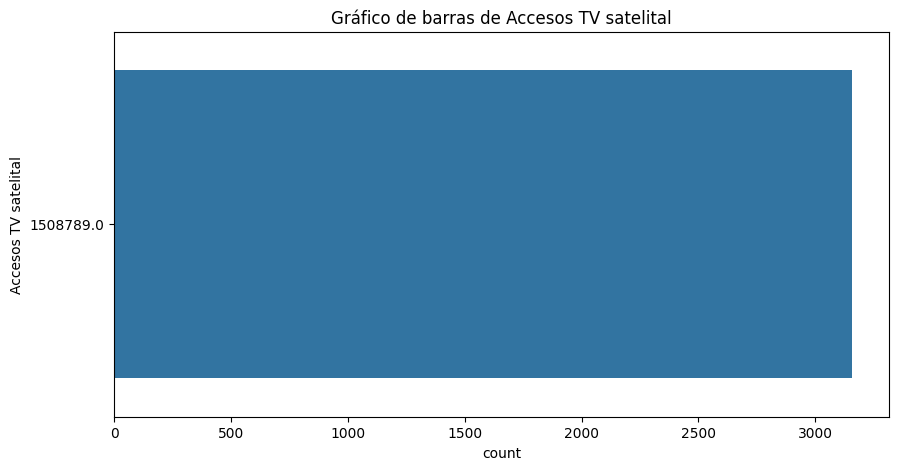

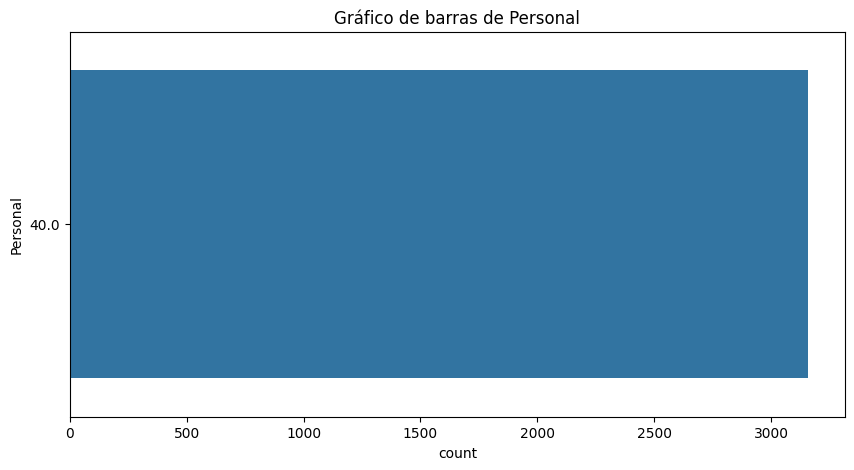

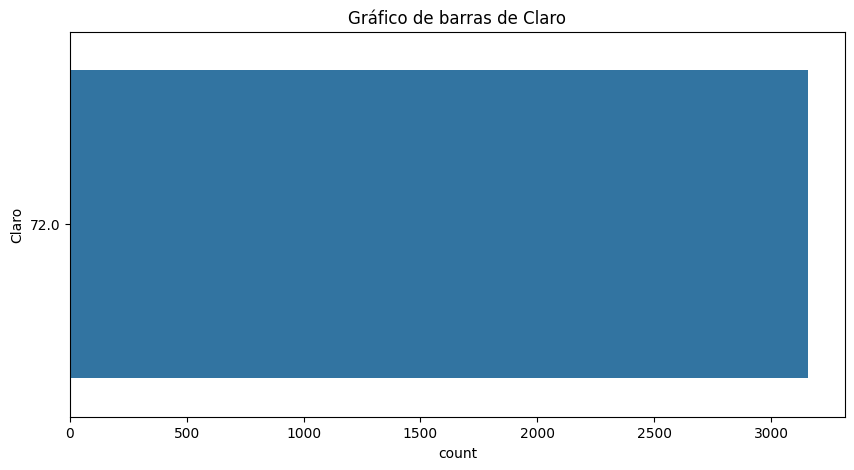

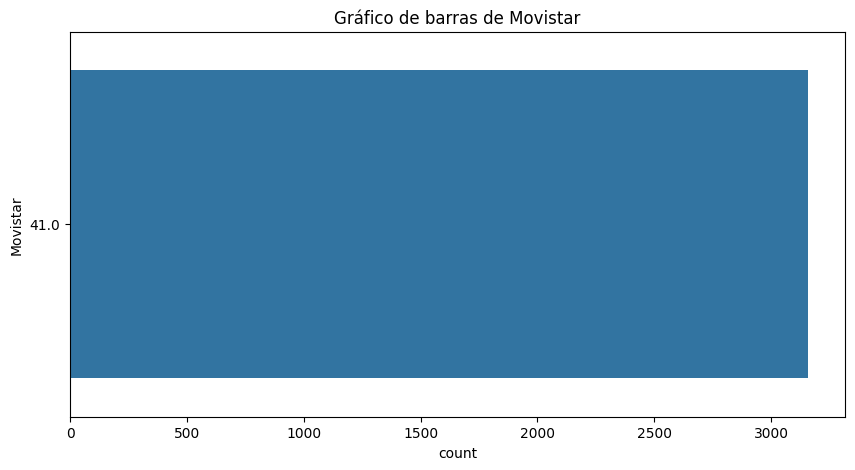

In [16]:
# Gráficos de barras para variables categóricas
for col in categoricas_columnas:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df_consolidado[col])
    plt.title(f'Gráfico de barras de {col}')
    plt.show()


Text(0, 0.5, 'Ingresos (miles de pesos)')

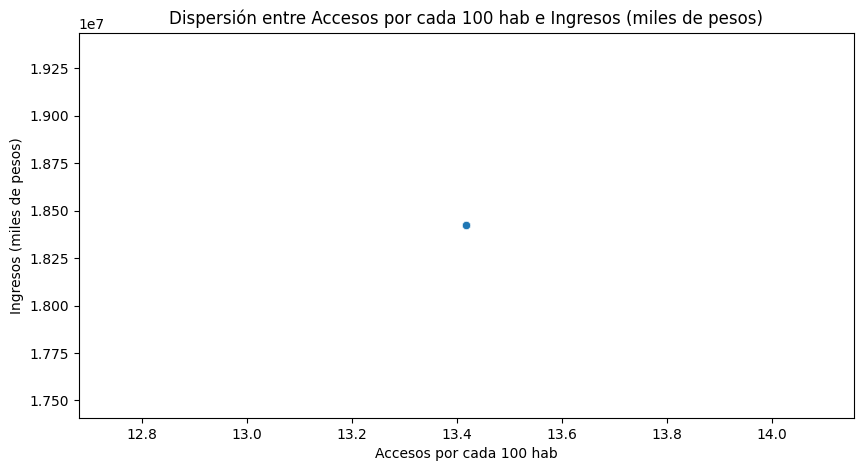

In [17]:
# Gráfico de dispersión entre dos variables numéricas
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_consolidado['Accesos por cada 100 hab'], y=df_consolidado['Ingresos (miles de pesos)'])
plt.title('Dispersión entre Accesos por cada 100 hab e Ingresos (miles de pesos)')
plt.xlabel('Accesos por cada 100 hab')
plt.ylabel('Ingresos (miles de pesos)')

Datos preparados para ser  importar al Dashboard(Power Bi)

In [18]:
df_consolidado.to_csv('datos_consolidados.csv', index=False)
